# Project Name: PFA Housing Project

### Problem Statement: 

#### Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

#### • Which variables are important to predict the price of variable?
#### • How do these variables describe the price of the house?

### Bussiness Goal

#### You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Data Description: 


#### • Data contains 1460 entries each having 81 variables.
#### • Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
#### • Extensive EDA has to be performed to gain relationships of important variable and price.
#### • Data contains numerical as well as categorical variable. You need to handle them accordingly.
#### • You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
#### • You need to find important features which affect the price positively or negatively.
#### • Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

### Lets us now import all the essential python libraries for importing the data, doing data preprocessing, EDA, Model building, feature engineering, Hyper Parameter tuning and saving the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor, XGBRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, power_transform, StandardScaler
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA

### Let us now import the dataset using pd.read_csv

In [2]:
ds = pd.read_csv("S:\Data Science Projects\Flip Robo\PFA_Housing_Project/train.csv")
dstest = pd.read_csv("S:\Data Science Projects\Flip Robo\PFA_Housing_Project/test.csv")

In [3]:
fin = dstest.copy()

lets now see first 5 columns using ds.head() method

In [4]:
ds.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

lets see more information about the dataset using ds.info() method

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

lets now visualize the missing values using heatmap method of seaborn library

<AxesSubplot:>

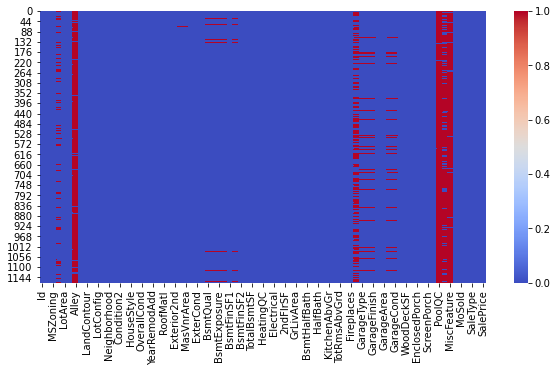

In [6]:
plt.figure(figsize = (10,5))
sns.heatmap(ds.isnull(),cmap='coolwarm')

In [7]:
for i in ds.columns:
    print("Column name:", i, "Mising Values are: ", ds[i].isnull().sum())

Column name: Id Mising Values are:  0
Column name: MSSubClass Mising Values are:  0
Column name: MSZoning Mising Values are:  0
Column name: LotFrontage Mising Values are:  214
Column name: LotArea Mising Values are:  0
Column name: Street Mising Values are:  0
Column name: Alley Mising Values are:  1091
Column name: LotShape Mising Values are:  0
Column name: LandContour Mising Values are:  0
Column name: Utilities Mising Values are:  0
Column name: LotConfig Mising Values are:  0
Column name: LandSlope Mising Values are:  0
Column name: Neighborhood Mising Values are:  0
Column name: Condition1 Mising Values are:  0
Column name: Condition2 Mising Values are:  0
Column name: BldgType Mising Values are:  0
Column name: HouseStyle Mising Values are:  0
Column name: OverallQual Mising Values are:  0
Column name: OverallCond Mising Values are:  0
Column name: YearBuilt Mising Values are:  0
Column name: YearRemodAdd Mising Values are:  0
Column name: RoofStyle Mising Values are:  0
Column

from above we can see the missing values of every columns in the dataset

lets see descriptive stastics of the data using ds.describe() method

In [8]:
ds.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

lets visualize the descriptive stastics using heatmap

In [9]:
plt.figure(figsize = (30,10))
sns.heatmap(ds.describe(), annot=True, fmt='.2f', cmap='Blues')

<AxesSubplot:>

from here we can see lotarea and sales price has some big values in it

lets see how much percentage of data is missing in each columns

In [10]:
for i in ds.columns:
    if ds[i].isnull().sum()/ds.shape[0]*100 >= 50:
        print("Column Name:",i,"has {}% of missing values" .format(ds[i].isnull().sum()/ds.shape[0]*100))

Column Name: Alley has 93.40753424657534% of missing values
Column Name: PoolQC has 99.40068493150685% of missing values
Column Name: Fence has 79.70890410958904% of missing values
Column Name: MiscFeature has 96.23287671232876% of missing values


from above we can see the columns which has more than 50% of missing values we will drop this columns

In [11]:
ds.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)

In [12]:
ds.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL          NaN     4928   Pave      IR1         Lvl   
1  889          20       RL         95.0    15865   Pave      IR1         Lvl   
2  793          60       RL         92.0     9920   Pave      IR1         Lvl   
3  110          20       RL        105.0    11751   Pave      IR1         Lvl   
4  422          20       RL          NaN    16635   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub    Inside  ...             0         0         224        0   
2    AllPub   CulDSac  ...             0         0           0        0   
3    AllPub    Inside  ...             0         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2007        WD         Normal     128000  
1       0     10    2007        WD         Normal     268000  
2       0      6    2007        WD         Normal     269790  
3       0      1    2010       COD         Normal     190000  
4       0      6    2009        WD         Normal     215000  

[5 rows x 77 columns]

lets fill na values with mean for numeric data, mode for categorical data

lets now fill the nan values

In [13]:
ds['LotFrontage'].dtype

dtype('float64')

In [14]:
for i in ds.columns:
    if ds[i].isnull().sum() >= 1:
        print(i)

LotFrontage
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond


In [15]:
ds['LotFrontage'] = ds['LotFrontage'].fillna(ds['LotFrontage'].mean())


In [16]:
pd.set_option('display.max_columns', None)

In [17]:
ds.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL     70.98847     4928   Pave      IR1         Lvl   
1  889          20       RL     95.00000    15865   Pave      IR1         Lvl   
2  793          60       RL     92.00000     9920   Pave      IR1         Lvl   
3  110          20       RL    105.00000    11751   Pave      IR1         Lvl   
4  422          20       RL     70.98847    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd  

In [18]:
ds['MasVnrType'] = ds['MasVnrType'].fillna(ds['MasVnrType'].mode()[0])
ds['MasVnrArea'] = ds['MasVnrArea'].fillna(ds['MasVnrArea'].mean())
ds['BsmtQual'] = ds['BsmtQual'].fillna(ds['BsmtQual'].mode()[0])
ds['BsmtCond'] = ds['BsmtCond'].fillna(ds['BsmtCond'].mode()[0])
ds['BsmtExposure'] = ds['BsmtExposure'].fillna(ds['BsmtExposure'].mode()[0])
ds['BsmtFinType1'] = ds['BsmtFinType1'].fillna(ds['BsmtFinType1'].mode()[0])
ds['BsmtFinType2'] = ds['BsmtFinType2'].fillna(ds['BsmtFinType2'].mode()[0])
ds['FireplaceQu'] = ds['FireplaceQu'].fillna(ds['FireplaceQu'].mode()[0])
ds['GarageType'] = ds['GarageType'].fillna(ds['GarageType'].mode()[0])
ds['GarageYrBlt'] = ds['GarageYrBlt'].fillna(ds['GarageYrBlt'].mean())
ds['GarageFinish'] = ds['GarageFinish'].fillna(ds['GarageFinish'].mode()[0])
ds['GarageQual'] = ds['GarageQual'].fillna(ds['GarageQual'].mode()[0])
ds['GarageCond'] = ds['GarageCond'].fillna(ds['GarageCond'].mode()[0])

In [19]:
plt.figure(figsize = (10,5))
sns.heatmap(ds.isnull(),cmap='Blues')

<AxesSubplot:>

from above heatmap we can see that there are no missing values in the dataset as the heatmap is unicoloured

### As now we have no missing values in the dataset we will now perform Exploratory Data Analysis

let us drop id column as it will not help us 

In [20]:
ds.drop('Id', axis = 1, inplace = True)

In [21]:
ds.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
4          20       RL     70.98847    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd   
3          TA             7

## EXPLORATORY DATA ANALYSIS

From below diagram we can see that 1-STORY 1946 & NEWER ALL STYLES has more number Count than any other dwelling type


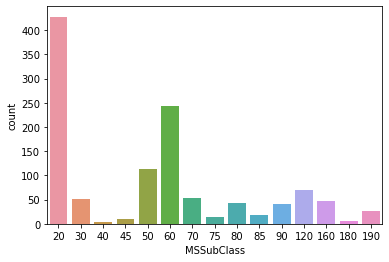

In [22]:
sns.countplot(ds['MSSubClass'])
print("From below diagram we can see that 1-STORY 1946 & NEWER ALL STYLES has more number Count than any other dwelling type")

From below diagram we can see that Residential Low Density area has more number of House on sales


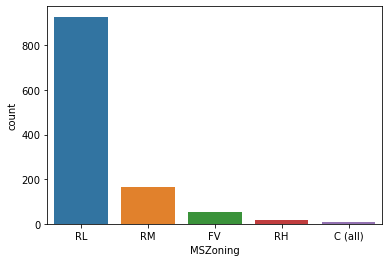

In [23]:
sns.countplot(ds['MSZoning'])
print("From below diagram we can see that Residential Low Density area has more number of House on sales")

So from below diagram Type of road access to property as Paved has the heighest count 


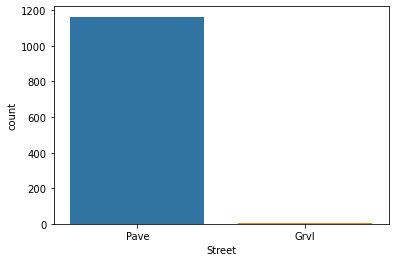

In [24]:
sns.countplot(ds['Street'])
print("So from below diagram Type of road access to property as Paved has the heighest count ")

From below countplot we can see the General shape of property as Regular has the heighest count


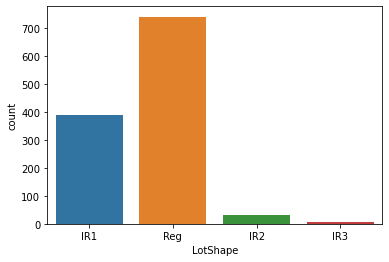

In [25]:
sns.countplot(ds['LotShape'])
print("From below countplot we can see the General shape of property as Regular has the heighest count")

from below diagraom we can see that the Flatness of the property is level for most of the property


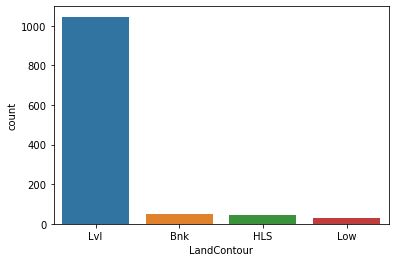

In [26]:
sns.countplot(ds['LandContour'])
print("from below diagraom we can see that the Flatness of the property is level for most of the property")

From the below diagram we can see that the traning dataset has only one utilities i.e All public Utilities (E,G,W,& S)


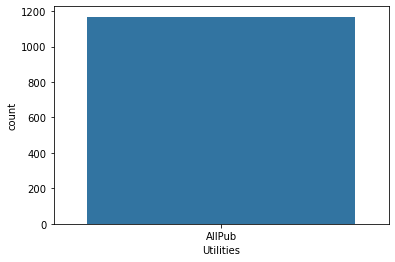

In [27]:
sns.countplot(ds['Utilities'])
print("From the below diagram we can see that the traning dataset has only one utilities i.e All public Utilities (E,G,W,& S)")

From below diagram we can see that the Lot configuration column has insite as the heighest count


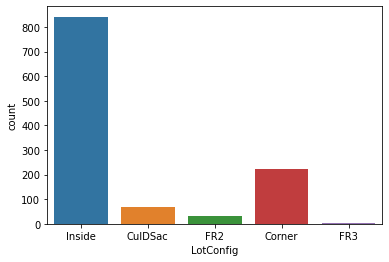

In [28]:
sns.countplot(ds['LotConfig'])
print("From below diagram we can see that the Lot configuration column has insite as the heighest count")

From below diagram we can see that Gentle slope has the heighest count


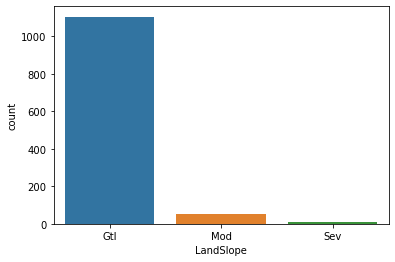

In [29]:
sns.countplot(ds['LandSlope'])
print("From below diagram we can see that Gentle slope has the heighest count")

In [30]:
plt.figure(figsize = (30,5))
sns.countplot(ds['Neighborhood'])
print("From below diagram we can see that North Ames has the highest count")

From below diagram we can see that North Ames has the highest count


From below diagram we can see that Proximity to various conditions as Normal has the heighest count


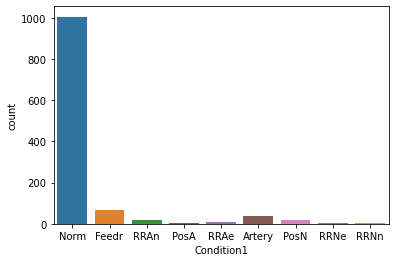

In [31]:
sns.countplot(ds['Condition1'])
print("From below diagram we can see that Proximity to various conditions as Normal has the heighest count")

From below diagram we can see that Proximity to various conditions (if more than one is present) has also Normal has the heighest count


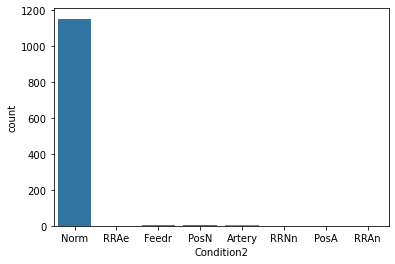

In [32]:
sns.countplot(ds['Condition2'])
print("From below diagram we can see that Proximity to various conditions (if more than one is present) has also Normal has the heighest count")

From below diagram we can see that the type of dwelling which has the heighest count is Single-family Detached


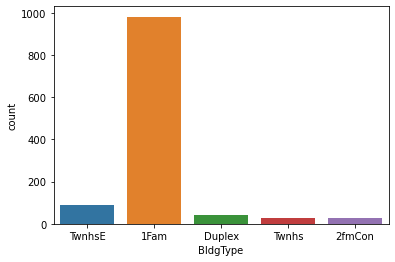

In [33]:
sns.countplot(ds['BldgType'])
print("From below diagram we can see that the type of dwelling which has the heighest count is Single-family Detached")

From below diagram we can see that style of dwelling as 1 story has the heighest count


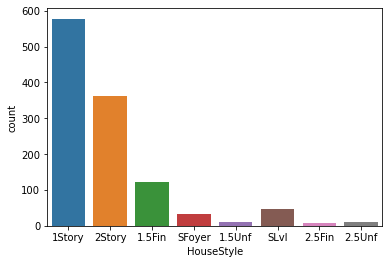

In [34]:
sns.countplot(ds['HouseStyle'])
print("From below diagram we can see that style of dwelling as 1 story has the heighest count")

From below graph we can see that most of the housing ratings are average i.e 5


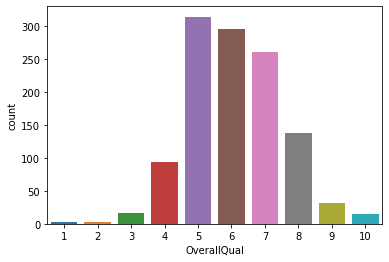

In [35]:
sns.countplot(ds['OverallQual'])
print("From below graph we can see that most of the housing ratings are average i.e 5")

From below figure we can see that the overall condition of the house i.e average has the heighest count


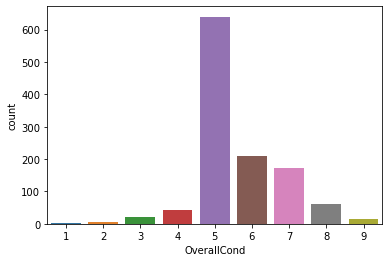

In [36]:
sns.countplot(ds['OverallCond'])
print("From below figure we can see that the overall condition of the house i.e average has the heighest count")

From below figure we can see that the roof style which has the heighest count is Gable


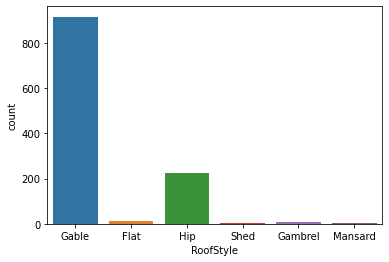

In [37]:
sns.countplot(ds['RoofStyle'])
print("From below figure we can see that the roof style which has the heighest count is Gable")

In [38]:
plt.figure(figsize = (8,5))
sns.countplot(ds['RoofMatl'])
print("From below we can see the roof material which has the heighest count is Standard (Composite) Shingle")

From below we can see the roof material which has the heighest count is Standard (Composite) Shingle


In [39]:
plt.figure(figsize = (15,5))
sns.countplot(ds['Exterior1st'])
print("From below figure we can see that the Exterior covering on house for most of the houses are Vinyl Siding")

From below figure we can see that the Exterior covering on house for most of the houses are Vinyl Siding


From below diagram we can see that the Exterior covering on house (if more than one material) for most of the houses are Vinyl Siding


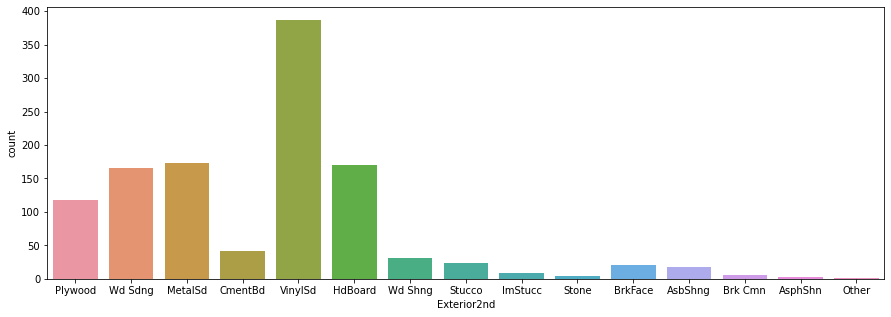

In [40]:
plt.figure(figsize = (15,5))
sns.countplot(ds['Exterior2nd'])
print("From below diagram we can see that the Exterior covering on house (if more than one material) for most of the houses are Vinyl Siding")

From below diagram we can see that Masonry veneer type as None has the heighest count


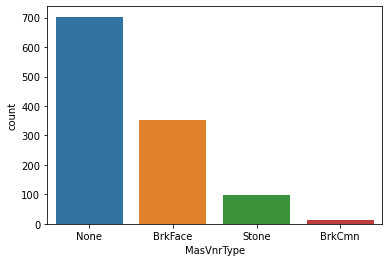

In [41]:
sns.countplot(ds['MasVnrType'])
print("From below diagram we can see that Masonry veneer type as None has the heighest count")

From below diagram we can see that the exterior quality of most of the houses are Average/Typical


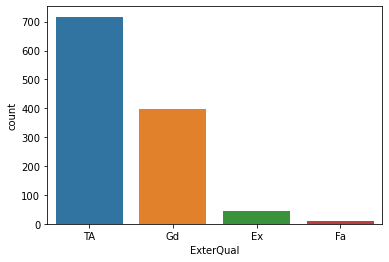

In [42]:
sns.countplot(ds['ExterQual'])
print("From below diagram we can see that the exterior quality of most of the houses are Average/Typical")

In [43]:
sns.countplot(ds['ExterCond'])
print("From below diagram we can see that the exterior condition of most of the houses are Average/Typical")

From below diagram we can see that the exterior condition of most of the houses are Average/Typical


From below diagram we can see that the Type of foundation of most of the houses are Cinder Block followed by Poured Contrete


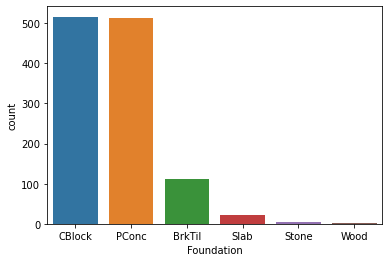

In [44]:
sns.countplot(ds['Foundation'])
ds['Foundation'].value_counts()
print("From below diagram we can see that the Type of foundation of most of the houses are Cinder Block followed by Poured Contrete")

In [45]:
sns.countplot(ds['BsmtQual'])
print("From the below diagram we can see that height of the basement for most of the houses are Typical (80-89 inches)")

From the below diagram we can see that height of the basement for most of the houses are Typical (80-89 inches)


From below figure we can see that the Basement condition of most of the houses are Typical - slight dampness allowed


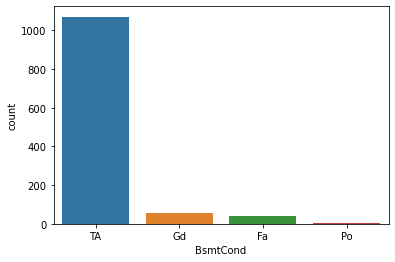

In [46]:
sns.countplot(ds['BsmtCond'])
print("From below figure we can see that the Basement condition of most of the houses are Typical - slight dampness allowed")

In [47]:
sns.countplot(ds['BsmtExposure'])
print("From the below figure we can see the Refers to walkout or garden level walls of most of the houses has No exposure")

From the below figure we can see the Refers to walkout or garden level walls of most of the houses has No exposure


In [48]:
sns.countplot(ds['BsmtFinType1'])
print("from below figure we can see that Rating of basement finished area for most of the houses are Unfinshed")

from below figure we can see that Rating of basement finished area for most of the houses are Unfinshed


from below figure we can see that Rating of basement finished area (if multiple types) is also Unfinished


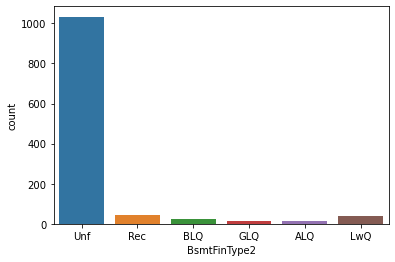

In [49]:
sns.countplot(ds['BsmtFinType2'])
print("from below figure we can see that Rating of basement finished area (if multiple types) is also Unfinished")

From below graph we can see that the heating of most of the house depends upon Gas forced warm air furnace


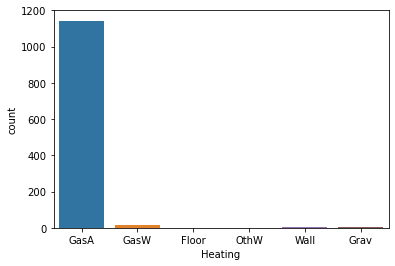

In [50]:
sns.countplot(ds['Heating'])
print("From below graph we can see that the heating of most of the house depends upon Gas forced warm air furnace")

from below diagram we can see that the heating quality of most of the houses are HeatingQC


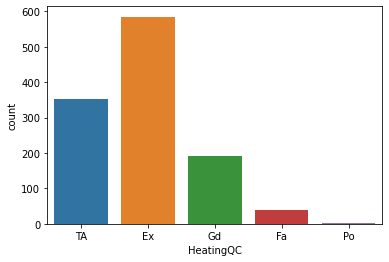

In [51]:
sns.countplot(ds['HeatingQC'])
print("from below diagram we can see that the heating quality of most of the houses are HeatingQC")

from below diagram we can see that most of the houses has CentralAir Conditioners


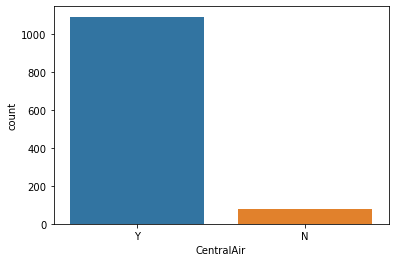

In [52]:
sns.countplot(ds['CentralAir'])
print("from below diagram we can see that most of the houses has CentralAir Conditioners")

From below diagram we can see that the Electrical System of most of the houses are Standard Circuit Breakers & Romex


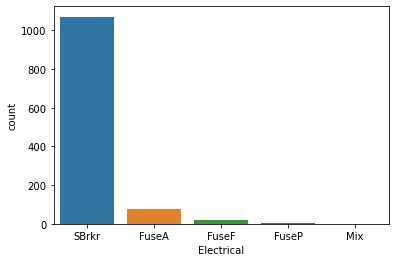

In [53]:
sns.countplot(ds['Electrical'])
print("From below diagram we can see that the Electrical System of most of the houses are Standard Circuit Breakers & Romex")

from below diagram we can see that most of the houses has Kitchen Quality as Typical/Average


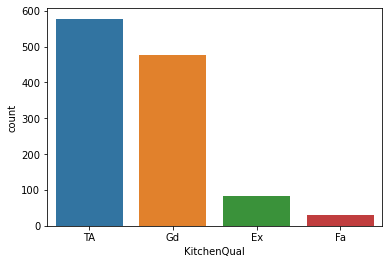

In [54]:
sns.countplot(ds['KitchenQual'])
print("from below diagram we can see that most of the houses has Kitchen Quality as Typical/Average")

From below diagram we can see that Home functionality (Assume typical unless deductions are warranted) of most of the houses are Typical Functionality type


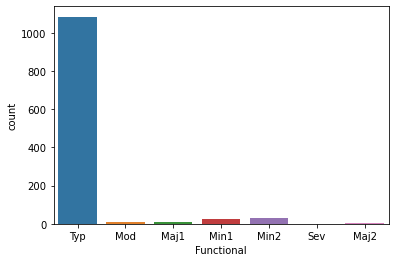

In [55]:
sns.countplot(ds['Functional'])
print("From below diagram we can see that Home functionality (Assume typical unless deductions are warranted) of most of the houses are Typical Functionality type")

From below graph we can see that the Fireplace quality of most of the houses are Good - Masonry Fireplace in main level


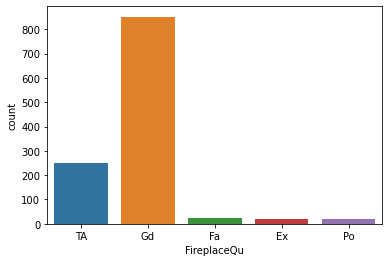

In [56]:
sns.countplot(ds['FireplaceQu'])
print("From below graph we can see that the Fireplace quality of most of the houses are Good - Masonry Fireplace in main level")

Form below graph we can see that the Garage location for most of the houses are Attached to home


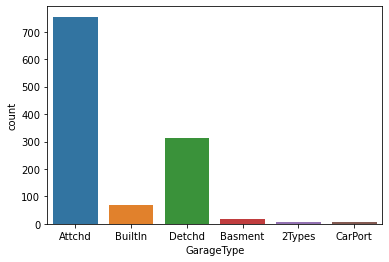

In [57]:
sns.countplot(ds['GarageType'])
print("Form below graph we can see that the Garage location for most of the houses are Attached to home")

From below graph we can see that for most of the houses Interior finish of the garage is Unfinished


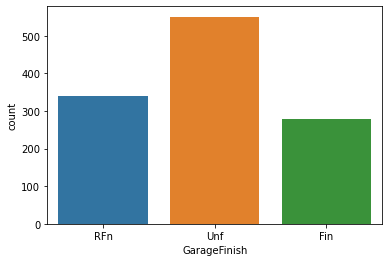

In [58]:
sns.countplot(ds['GarageFinish'])
print("From below graph we can see that for most of the houses Interior finish of the garage is Unfinished")

From below graph we can see for majority of the houses the garage quality is Typical/Average


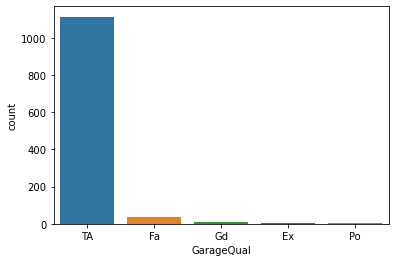

In [59]:
sns.countplot(ds['GarageQual'])
print("From below graph we can see for majority of the houses the garage quality is Typical/Average")

From below graph we can see that majority of houses garage condition is Typical/Average


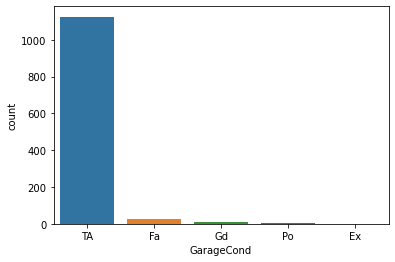

In [60]:
sns.countplot(ds['GarageCond'])
print("From below graph we can see that majority of houses garage condition is Typical/Average")

From below graph we can see that majority of the house has Paved driveway


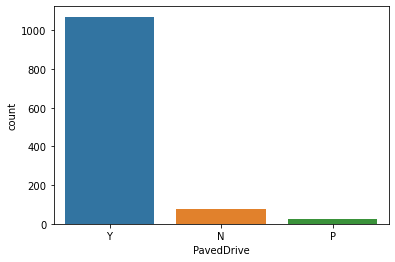

In [61]:
sns.countplot(ds['PavedDrive'])
print("From below graph we can see that majority of the house has Paved driveway")

From below graph we can see that majority of the houses are Warranty Deed - Conventional


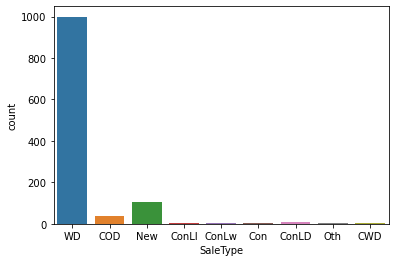

In [62]:
sns.countplot(ds['SaleType'])
print("From below graph we can see that majority of the houses are Warranty Deed - Conventional")

From below graph we can see that majority of the houses has Condition of sale as Normal


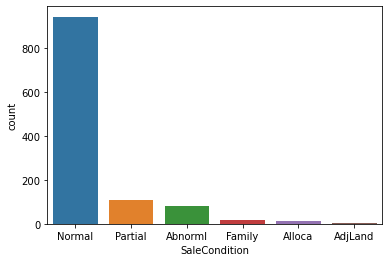

In [63]:
sns.countplot(ds['SaleCondition'])
print("From below graph we can see that majority of the houses has Condition of sale as Normal")

From here we can see that 2-STORY 1946 & NEWER has the heighest selling price


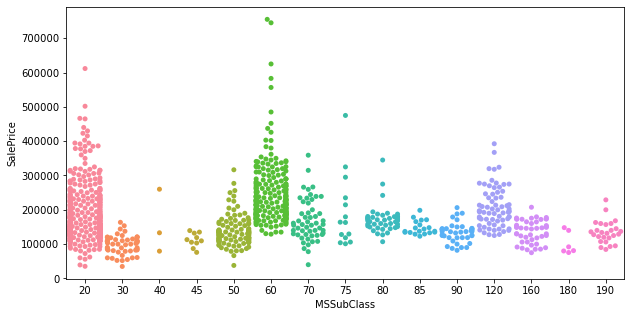

In [64]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='MSSubClass', y='SalePrice', data=ds)
print("From here we can see that 2-STORY 1946 & NEWER has the heighest selling price")

From below graph we can see that the area which haS Residential Low Density has heighest sales price


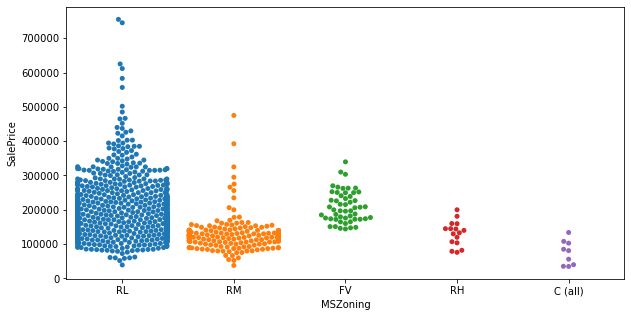

In [65]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='MSZoning', y='SalePrice', data = ds)
print("From below graph we can see that the area which haS Residential Low Density has heighest sales price")

From the below plot we can see that Linear feet of street connected to property has heighest selling price around 100-150


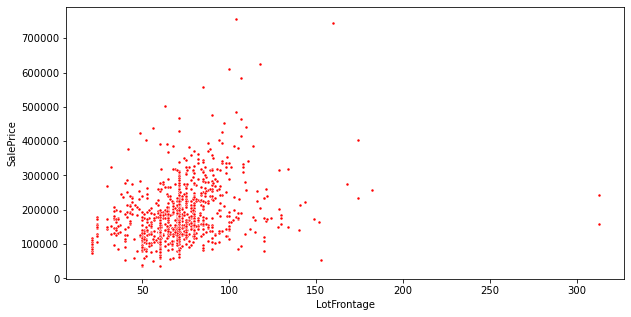

In [66]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='LotFrontage', y = 'SalePrice', data = ds, marker='.', color='red')
print("From the below plot we can see that Linear feet of street connected to property has heighest selling price around 100-150")

From the below graph we can see that Lot size in square feet below 40k has the heighest sales price


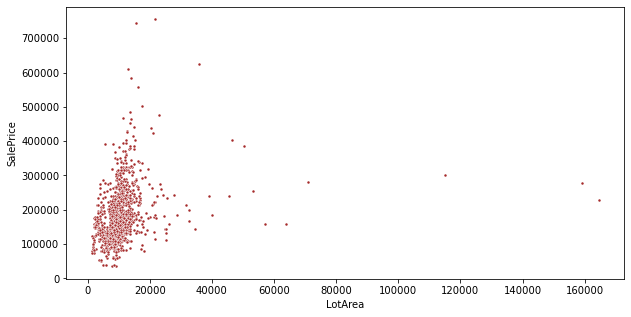

In [67]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='LotArea', y='SalePrice', data=ds, marker='.', color='brown')
print("From the below graph we can see that Lot size in square feet below 40k has the heighest sales price")

From the below graph we can see that Type of road access to property as paved has most count and has higher sales price


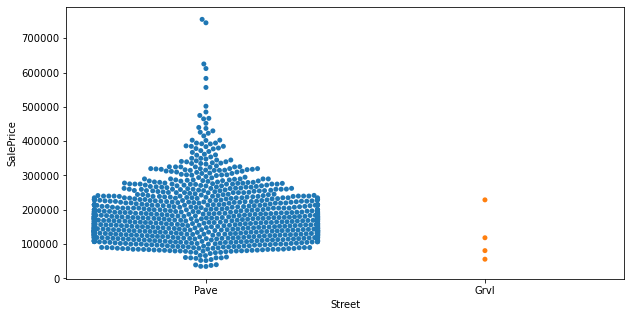

In [68]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='Street', y='SalePrice', data = ds)
print("From the below graph we can see that Type of road access to property as paved has most count and has higher sales price")

From the below graph we can see that the General shape of property as Slightly irregular has the heighest Sales Price


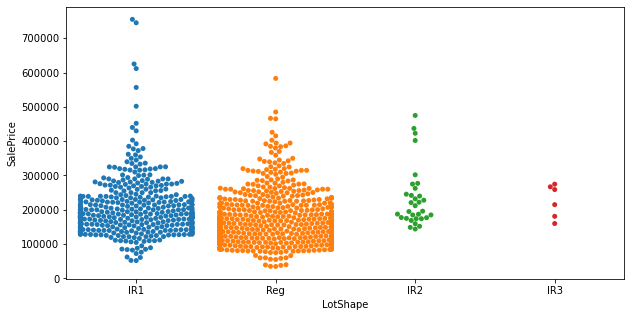

In [69]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='LotShape', y='SalePrice', data=ds)
print("From the below graph we can see that the General shape of property as Slightly irregular has the heighest Sales Price")

From the below graph we can see that the  Flatness of the property as Near Flat/Level has the heighest sales price


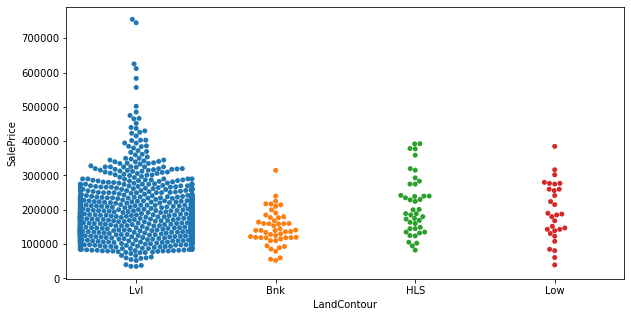

In [70]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='LandContour', y='SalePrice', data = ds)
print("From the below graph we can see that the  Flatness of the property as Near Flat/Level has the heighest sales price")

From the below figure we can see that Lot configuration as Corner has the heighest Selling Price


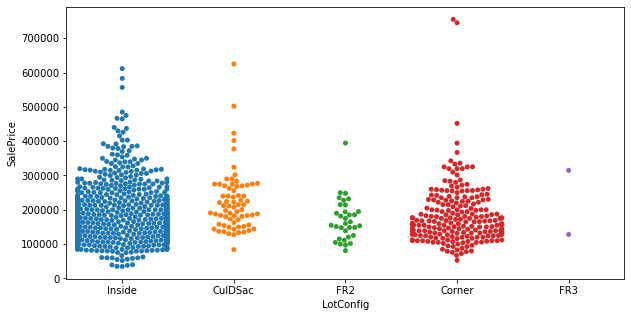

In [71]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='LotConfig', y='SalePrice', data = ds)
print("From the below figure we can see that Lot configuration as Corner has the heighest Selling Price")

From the below graph we can see that Slope of property as gentle slope has the heighest selling price


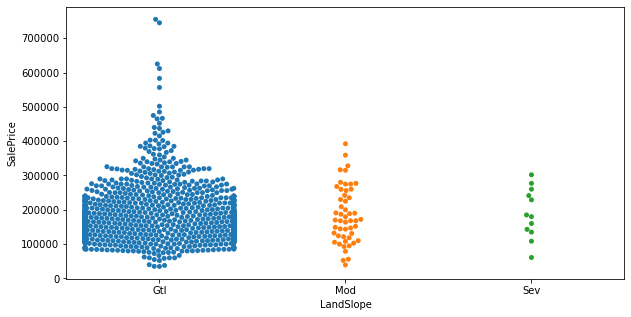

In [72]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='LandSlope', y='SalePrice', data = ds)
print("From the below graph we can see that Slope of property as gentle slope has the heighest selling price")

From below graph we can see that the  Physical locations within Ames city limits as Northridge has the heighest selling price


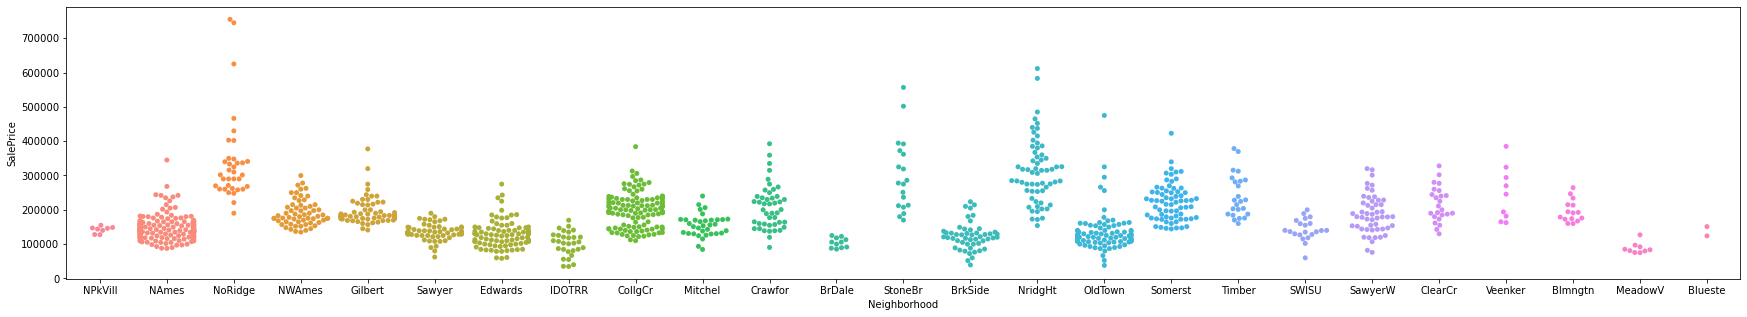

In [73]:
plt.figure(figsize = (30,5))
sns.swarmplot(x='Neighborhood', y='SalePrice', data = ds)
print("From below graph we can see that the  Physical locations within Ames city limits as Northridge has the heighest selling price")

From the below figure we can see that Proximity to various conditions as Normal has the heighest selling price


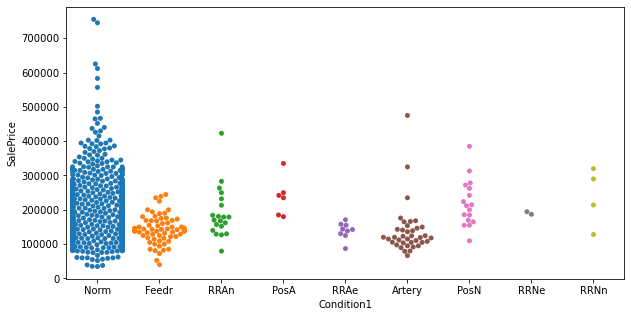

In [74]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='Condition1', y='SalePrice', data=ds)
print("From the below figure we can see that Proximity to various conditions as Normal has the heighest selling price")

From below figure we can see that Proximity to various conditions (if more than one is present) as Normal has the highest selling price


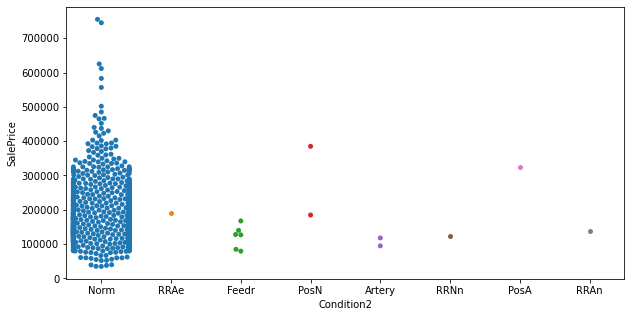

In [75]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='Condition2', y='SalePrice', data = ds)
print("From below figure we can see that Proximity to various conditions (if more than one is present) as Normal has the highest selling price")

from below graph we can see that the Type of dwelling as Single-family Detached	has the heighest selling price


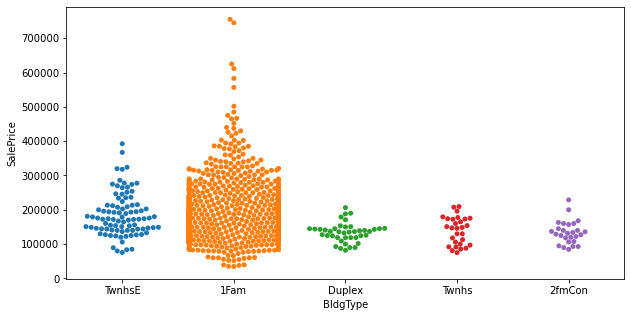

In [76]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='BldgType', y='SalePrice', data=ds)
print("from below graph we can see that the Type of dwelling as Single-family Detached	has the heighest selling price")

From below figure we can see that Style of dwelling as 2 Story has higher selling price


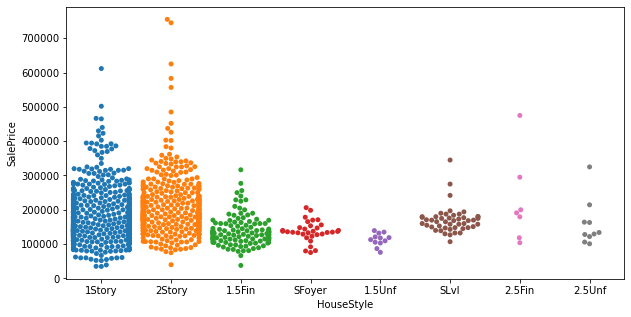

In [77]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='HouseStyle', y='SalePrice', data = ds)
print("From below figure we can see that Style of dwelling as 2 Story has higher selling price")

From below graph we can see that the price of the house increases with Overall Quality


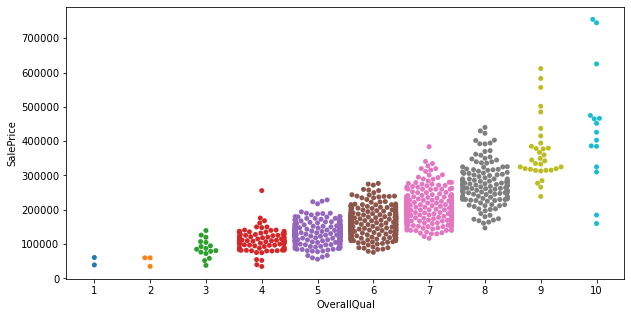

In [78]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='OverallQual', y='SalePrice', data = ds)
print("From below graph we can see that the price of the house increases with Overall Quality")

From the below graph we can see that the price of the overall condition is highest at 5 and 6


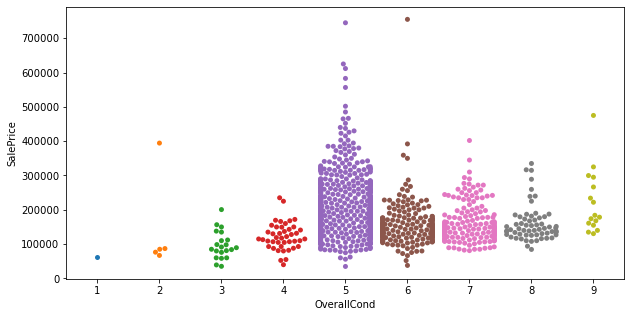

In [79]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='OverallCond', y='SalePrice', data = ds)
print("From the below graph we can see that the price of the overall condition is highest at 5 and 6")

From below graph we can see that Sales prices increases as the Year Build Increases newer the house more is the price


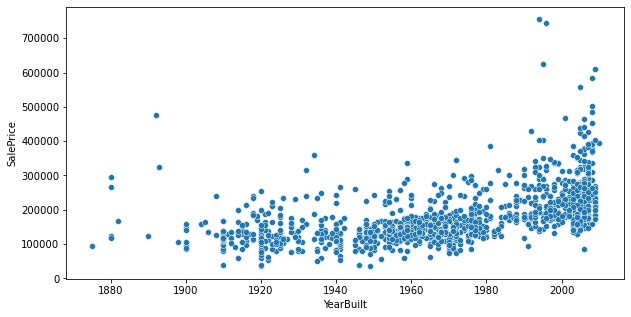

In [80]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='YearBuilt', y='SalePrice', data = ds)
print("From below graph we can see that Sales prices increases as the Year Build Increases newer the house more is the price")

From below graph we can see that Remodel date (same as construction date if no remodeling or additions) between 1990 - 2000 has the heighest selling prices


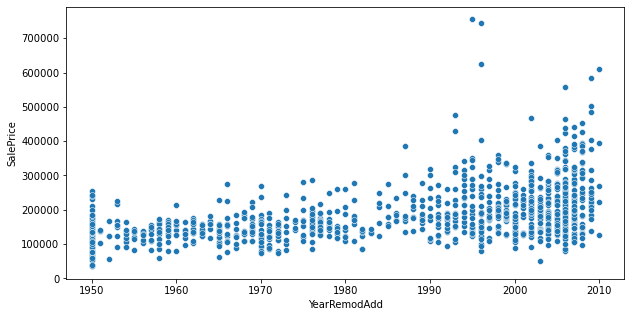

In [81]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data = ds)
print("From below graph we can see that Remodel date (same as construction date if no remodeling or additions) between 1990 - 2000 has the heighest selling prices")

From the below graph we can see that Type of roof Hip has high selling price and for Gable there is only one property with high price


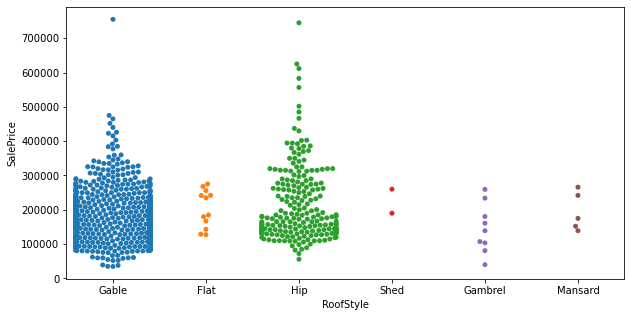

In [82]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='RoofStyle', y='SalePrice', data = ds)
print("From the below graph we can see that Type of roof Hip has high selling price and for Gable there is only one property with high price")

from below graph we can see that the Roof material as Standard (Composite) Shingle has higher selling value


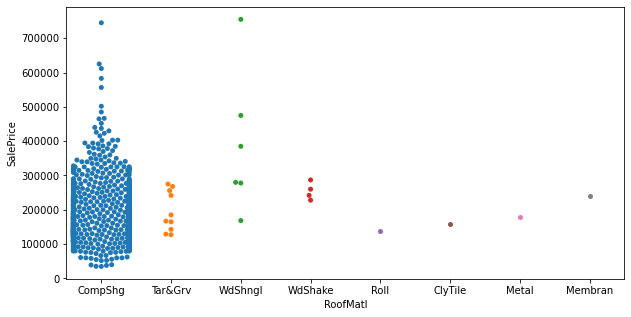

In [83]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='RoofMatl', y='SalePrice', data = ds)
print("from below graph we can see that the Roof material as Standard (Composite) Shingle has higher selling value")

From below graph we can see that Exterior covering on house as Wood Siding, Hard Board has the heighest selling price


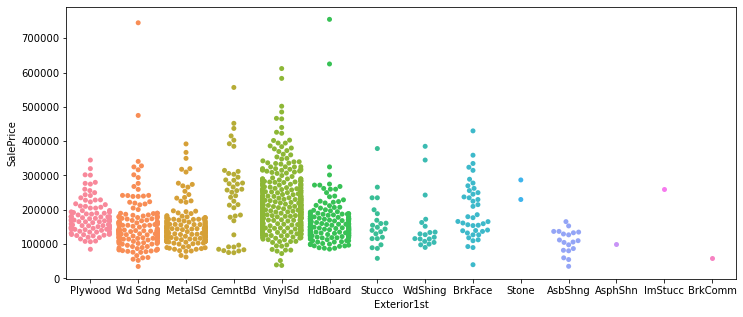

In [84]:
plt.figure(figsize=(12,5))
sns.swarmplot(x='Exterior1st', y='SalePrice', data = ds)
print("From below graph we can see that Exterior covering on house as Wood Siding, Hard Board has the heighest selling price")

From below graph we can see that Exterior covering on house (if more than one material) as Hard Board,Imitation Stucco has the heighest selling price


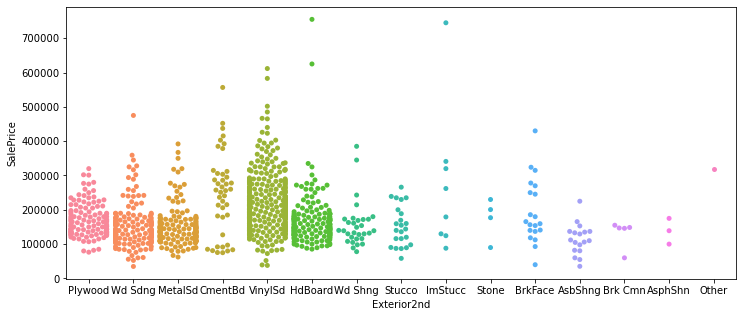

In [85]:
plt.figure(figsize = (12,5))
sns.swarmplot(x='Exterior2nd', y='SalePrice', data = ds)
print("From below graph we can see that Exterior covering on house (if more than one material) as Hard Board,Imitation Stucco has the heighest selling price")

In [86]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='MasVnrType', y='SalePrice', data= ds)
print("From below graph we can see that the Masonry veneer type as None and Brick Face has higher selling price")

From below graph we can see that the Masonry veneer type as None and Brick Face has higher selling price


From below we can see that the price of house increases as the Masonry veneer area in square feet increases but after some point it falls because of some other features


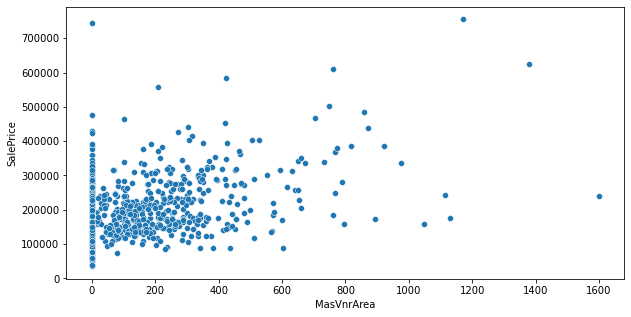

In [87]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='MasVnrArea', y='SalePrice', data = ds)
print("From below we can see that the price of house increases as the Masonry veneer area in square feet increases but after some point it falls because of some other features")

In [88]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='ExterQual', y='SalePrice', data = ds)
print("From below diagram we can see that Evaluates the quality of the material on the exterior as Good and Excellent has the highest price")

From below diagram we can see that Evaluates the quality of the material on the exterior as Good and Excellent has the highest price


In [89]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='ExterCond', y='SalePrice', data = ds)
print("From below we can see that Evaluates the present condition of the material on the exterior as Average has highest selling price")

From below we can see that Evaluates the present condition of the material on the exterior as Average has highest selling price


In [90]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='Foundation', y='SalePrice', data = ds)
print("From below diagram we can see that for Type of foundation as Poured Contrete has the heighest price")

From below diagram we can see that for Type of foundation as Poured Contrete has the heighest price


From below we can see that Evaluates the height of the basement as Excellent (100+ inches) has the highest Selling Price


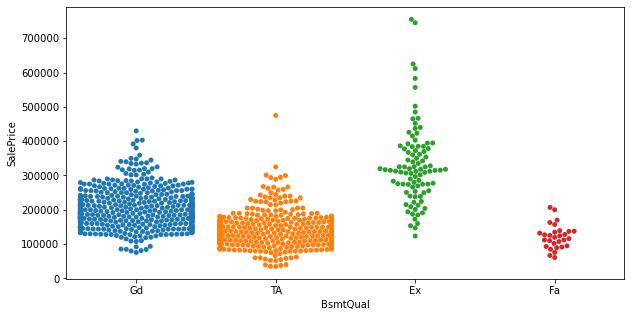

In [91]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='BsmtQual', y='SalePrice', data = ds)
print("From below we can see that Evaluates the height of the basement as Excellent (100+ inches) has the highest Selling Price")

From below diagram we can see that Evaluates the general condition of the basement as Typical - slight dampness allowed has the highest selling price 


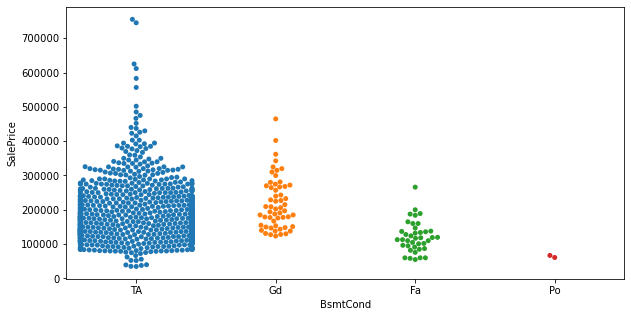

In [92]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='BsmtCond', y='SalePrice', data = ds)
print("From below diagram we can see that Evaluates the general condition of the basement as Typical - slight dampness allowed has the highest selling price ")

From below graph we can see that Refers to walkout or garden level walls as Good Exposure & Average Exposure has Higher selling price


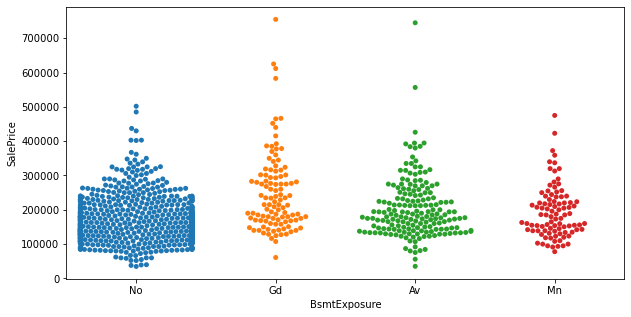

In [93]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='BsmtExposure', y='SalePrice', data = ds)
print("From below graph we can see that Refers to walkout or garden level walls as Good Exposure & Average Exposure has Higher selling price")

From below diagram we can see that Rating of basement finished area as Good Living Quarters has heighest selling price


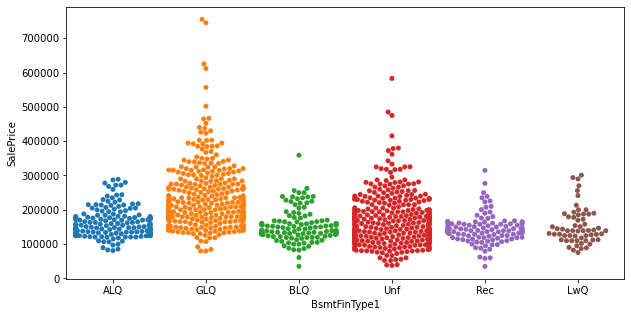

In [94]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='BsmtFinType1', y='SalePrice', data = ds)
print("From below diagram we can see that Rating of basement finished area as Good Living Quarters has heighest selling price")

From below graph we can see that Rating of basement finished area (if multiple types) as Unifinished has the heighest selling price


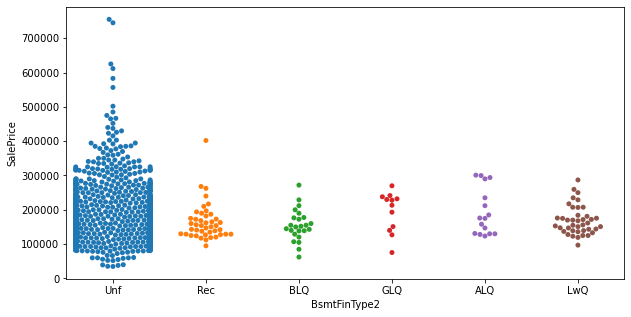

In [95]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='BsmtFinType2', y='SalePrice', data = ds)
print("From below graph we can see that Rating of basement finished area (if multiple types) as Unifinished has the heighest selling price")

From below graph we can see that Type of heating as Gas forced warm air furnace has the heighest selling price


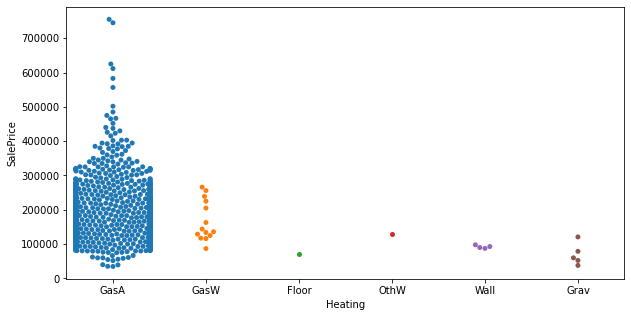

In [96]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='Heating', y='SalePrice', data = ds)
print("From below graph we can see that Type of heating as Gas forced warm air furnace has the heighest selling price")

From below graph we can see that Heating quality and condition as Excellent has the heighest selling price


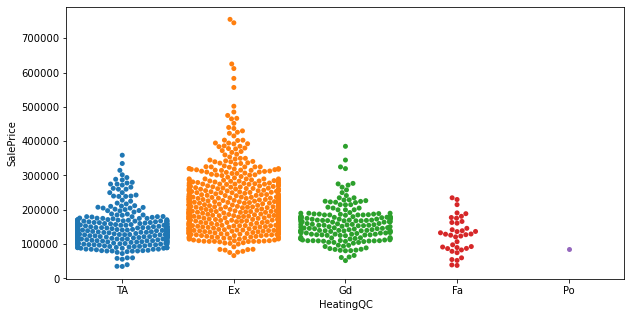

In [97]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='HeatingQC', y='SalePrice', data = ds)
print("From below graph we can see that Heating quality and condition as Excellent has the heighest selling price")

In [98]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='CentralAir', y = 'SalePrice', data = ds)
print("From below graph we can see that if the building has Central air conditioning then the price of the house is high")

From below graph we can see that if the building has Central air conditioning then the price of the house is high


From below graph we can see that Electrical system as Standard Circuit Breakers & Romex has higher selling price


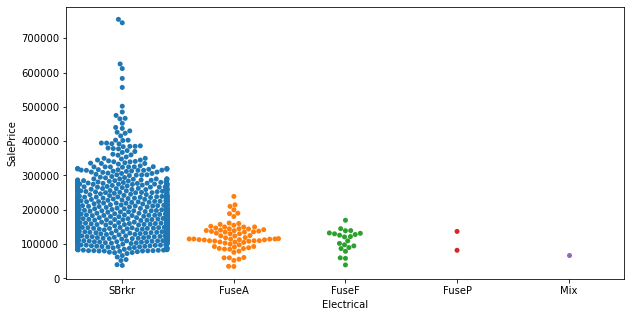

In [99]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='Electrical', y='SalePrice', data = ds)
print("From below graph we can see that Electrical system as Standard Circuit Breakers & Romex has higher selling price")

From below plot we can understand that as the sqarefeet of the house increases the price also increases


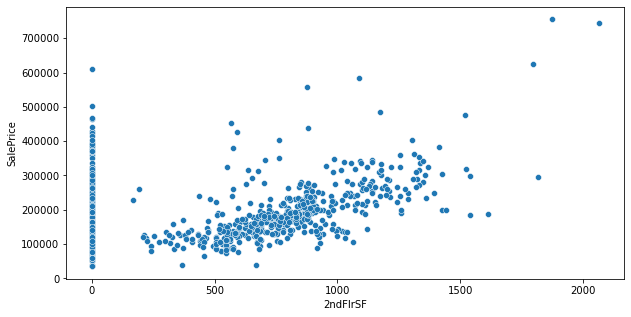

In [100]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='2ndFlrSF', y='SalePrice', data = ds)
print("From below plot we can understand that as the sqarefeet of the house increases the price also increases")

From below plot we can see that the Price of the house increases as the grade (ground) living area square feet increases


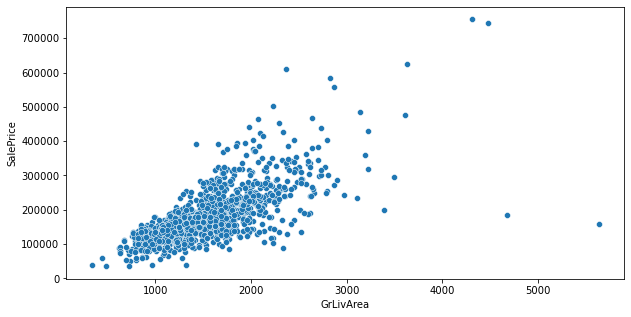

In [101]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data = ds)
print("From below plot we can see that the Price of the house increases as the grade (ground) living area square feet increases")

From below graph we can see that Basement full bathrooms above grade as 0 and 1 has the heighest selling prices


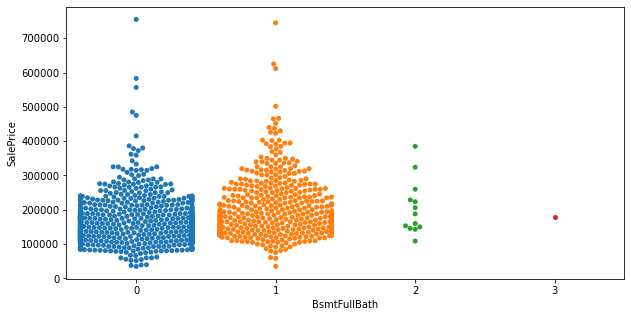

In [102]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='BsmtFullBath', y='SalePrice', data = ds)
print("From below graph we can see that Basement full bathrooms above grade as 0 and 1 has the heighest selling prices")

from below plot we can see that Basement half bathrooms above grade as 0 has the heighest selling price


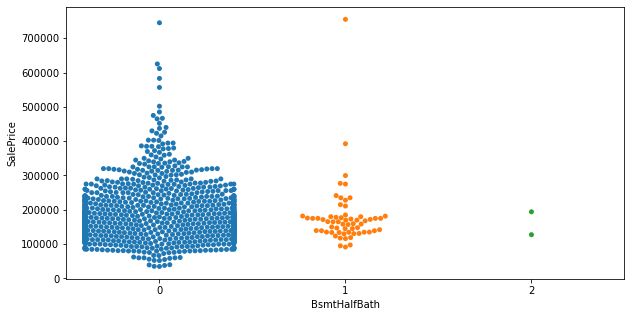

In [103]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='BsmtHalfBath', y='SalePrice', data = ds)
print("from below plot we can see that Basement half bathrooms above grade as 0 has the heighest selling price")

from below diagram we can see that Full bathrooms above grade as 3 has the heighest selling price


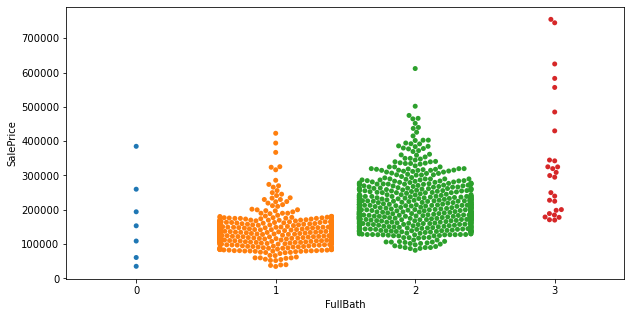

In [104]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='FullBath', y='SalePrice', data = ds)
print("from below diagram we can see that Full bathrooms above grade as 3 has the heighest selling price")

From below graph we can see that Half baths above grade as 1 has the heighest selling price


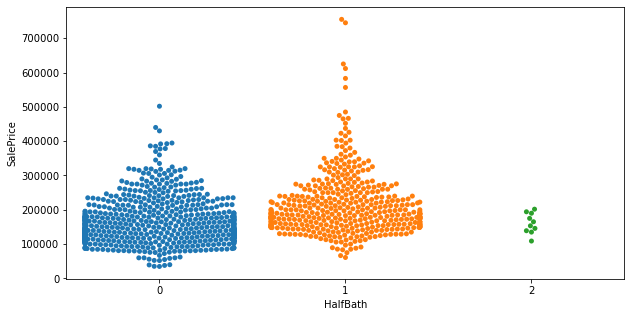

In [105]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='HalfBath', y='SalePrice', data = ds)
print("From below graph we can see that Half baths above grade as 1 has the heighest selling price")

In [106]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='KitchenQual', y='SalePrice', data = ds)
print("From below plots we can see that Kitchen quality as Excellent has the heighest selling price")

From below plots we can see that Kitchen quality as Excellent has the heighest selling price


From below diagram we can see that Total rooms above grade (does not include bathrooms) as 10 has the heighest Selling price


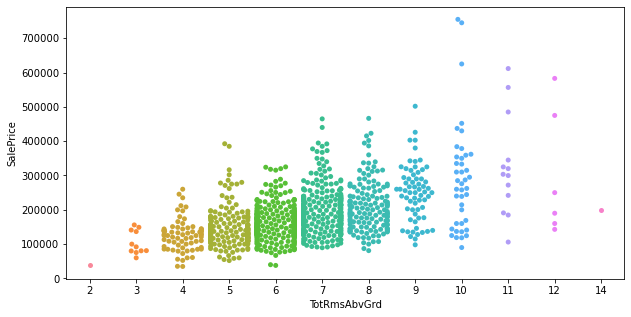

In [107]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='TotRmsAbvGrd', y='SalePrice', data = ds)
print("From below diagram we can see that Total rooms above grade (does not include bathrooms) as 10 has the heighest Selling price")

In [108]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='Functional', y='SalePrice', data = ds)
print("From above we can see that Home functionality (Assume typical unless deductions are warranted) as Typical Functionality has the heighest selling price")

From above we can see that Home functionality (Assume typical unless deductions are warranted) as Typical Functionality has the heighest selling price


From below plots we can see that Number of fireplaces as 2 has the heighest Selling Price


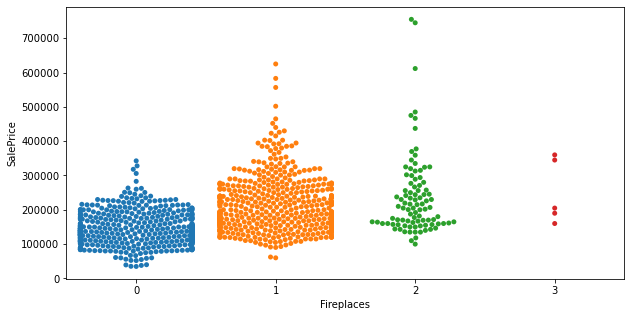

In [109]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='Fireplaces', y='SalePrice', data = ds)
print("From below plots we can see that Number of fireplaces as 2 has the heighest Selling Price")

From below plot we can say that Fireplace quality as Excellent and Average has the heighest selling prices


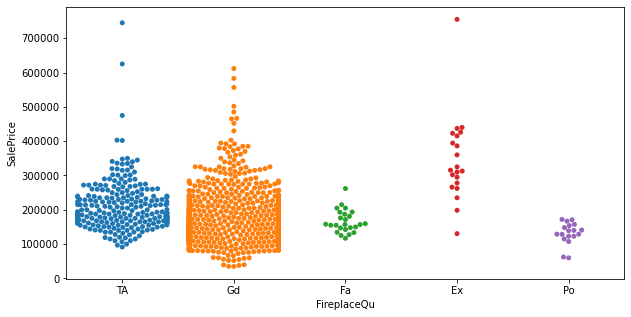

In [110]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='FireplaceQu', y='SalePrice', data = ds)
print("From below plot we can say that Fireplace quality as Excellent and Average has the heighest selling prices")

From below diagram we can see that Garage location as Attached to home has the higher selling price


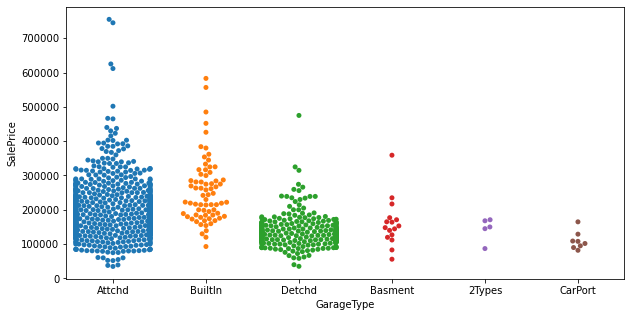

In [111]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='GarageType', y='SalePrice', data= ds)
print("From below diagram we can see that Garage location as Attached to home has the higher selling price")

As the built year move towards 2000 the selling price of the Housing increases


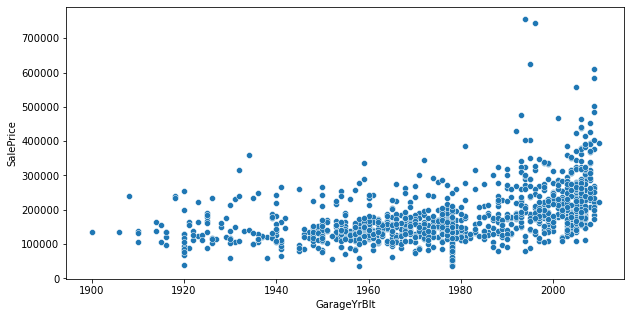

In [112]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data = ds)
print("As the built year move towards 2000 the selling price of the Housing increases")

From below plot we can say that Interior finish of the garage as Finished has the heighest Selling Price


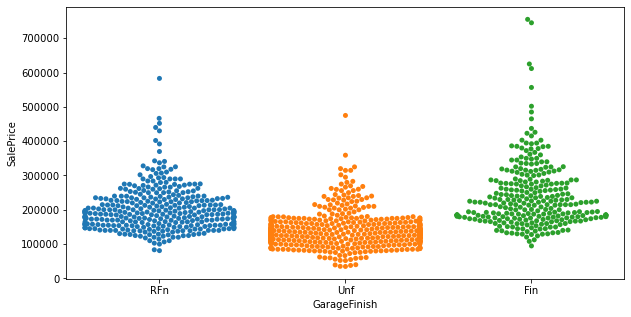

In [113]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='GarageFinish', y='SalePrice', data = ds)
print("From below plot we can say that Interior finish of the garage as Finished has the heighest Selling Price")

In [114]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='GarageCars', y='SalePrice', data = ds)
print("From below plot we can say that Size of garage in car capacity as 3 has the heighest Selling Price")

From below plot we can say that Size of garage in car capacity as 3 has the heighest Selling Price


In [115]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='GarageQual', y='SalePrice', data = ds)
print("from below plot we can see that Garage quality as Average has the heighest selling price")

from below plot we can see that Garage quality as Average has the heighest selling price


In [116]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='GarageCond', y='SalePrice', data = ds)
print("From below plot we can see that Garage condition as average has the heighest sellling price")

From below plot we can see that Garage condition as average has the heighest sellling price


From below graph we can say that if Paved driveway is Preent the the house has higher selling price


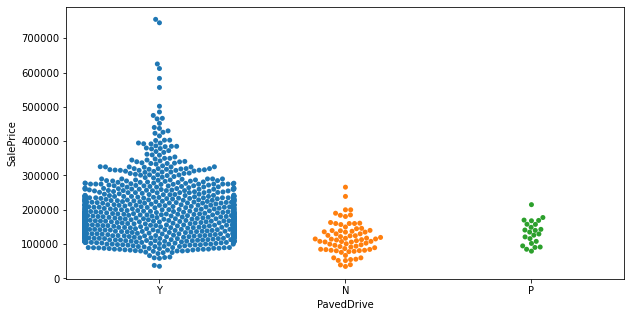

In [117]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='PavedDrive', y='SalePrice', data = ds)
print("From below graph we can say that if Paved driveway is Preent the the house has higher selling price")

From below diagram we can see that Year 2007 has the heighest selling price


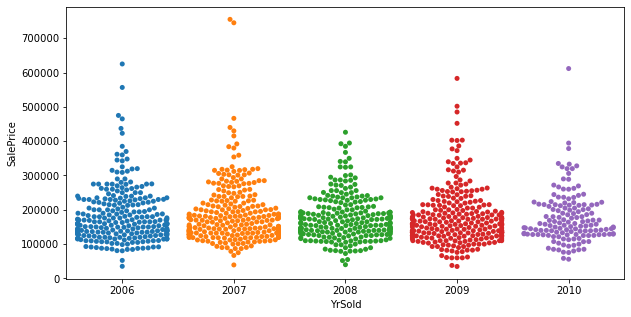

In [118]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='YrSold', y='SalePrice', data = ds)
print("From below diagram we can see that Year 2007 has the heighest selling price")

From below diagram we can see that Type of sale as Warranty Deed - Conventional has the heighest selling price


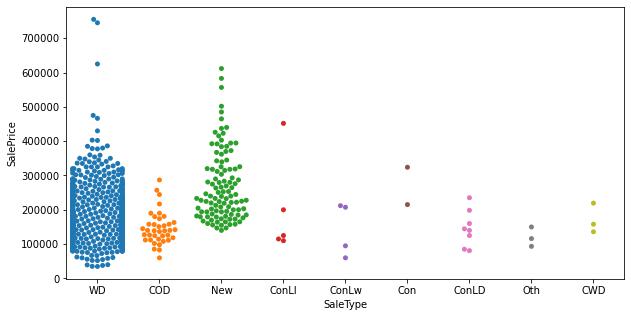

In [119]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='SaleType', y='SalePrice', data = ds)
print("From below diagram we can see that Type of sale as Warranty Deed - Conventional has the heighest selling price")

From below we can see that the Condition of sale as Normal has the highest Selling Price


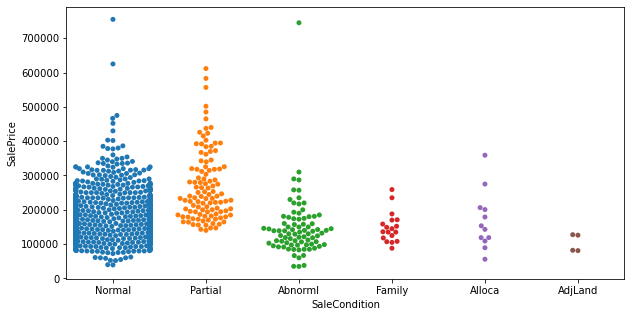

In [120]:
plt.figure(figsize = (10,5))
sns.swarmplot(x='SaleCondition', y = 'SalePrice', data = ds)
print("From below we can see that the Condition of sale as Normal has the highest Selling Price")

## DATA PREPROCESSING

Lets check the contents of both test and train data

In [121]:
ds.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

lets drop the columns which we dropped for the train data

In [122]:
dstest.drop(['Alley','PoolQC','Fence','MiscFeature','Id'], axis = 1, inplace = True)

lets fix the NaN values in the test dataset

In [123]:
for i in dstest.columns:
    if dstest[i].isnull().sum():
        print("Column name",i)

Column name LotFrontage
Column name MasVnrType
Column name MasVnrArea
Column name BsmtQual
Column name BsmtCond
Column name BsmtExposure
Column name BsmtFinType1
Column name BsmtFinType2
Column name Electrical
Column name FireplaceQu
Column name GarageType
Column name GarageYrBlt
Column name GarageFinish
Column name GarageQual
Column name GarageCond


In [124]:
ds.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
4          20       RL     70.98847    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd   
3          TA             7

In [125]:
dstest['LotFrontage'] = dstest['LotFrontage'].fillna(dstest['LotFrontage'].mean())
dstest['MasVnrType'] = dstest['MasVnrType'].fillna(dstest['MasVnrType'].mode()[0])
dstest['MasVnrArea'] = dstest['MasVnrArea'].fillna(dstest['MasVnrArea'].mean())
dstest['BsmtQual'] = dstest['BsmtQual'].fillna(dstest['BsmtQual'].mode()[0])
dstest['BsmtCond'] = dstest['BsmtCond'].fillna(dstest['BsmtCond'].mode()[0])
dstest['BsmtExposure'] = dstest['BsmtExposure'].fillna(dstest['BsmtExposure'].mode()[0])
dstest['BsmtFinType1'] = dstest['BsmtFinType1'].fillna(dstest['BsmtFinType1'].mode()[0])
dstest['BsmtFinType2'] = dstest['BsmtFinType2'].fillna(dstest['BsmtFinType2'].mode()[0])
dstest['Electrical'] = dstest['Electrical'].fillna(dstest['Electrical'].mode()[0])
dstest['FireplaceQu'] = dstest['FireplaceQu'].fillna(dstest['FireplaceQu'].mode()[0])
dstest['GarageType'] = dstest['GarageType'].fillna(dstest['GarageType'].mode()[0])
dstest['GarageYrBlt'] = dstest['GarageYrBlt'].fillna(dstest['GarageYrBlt'].mean())
dstest['GarageFinish'] = dstest['GarageFinish'].fillna(dstest['GarageFinish'].mode()[0])
dstest['GarageQual'] = dstest['GarageQual'].fillna(dstest['GarageQual'].mode()[0])
dstest['GarageCond'] = dstest['GarageCond'].fillna(dstest['GarageCond'].mode()[0])

we have filled all NaN values in test dataset lets now compare all the elements of test dataset and train dataset and see if there are any extra fields in the test dataset which we dont have in train dataset

In [126]:
ds.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
4          20       RL     70.98847    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd   
3          TA             7

In [127]:
dstest.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL    86.000000    14157   Pave      IR1         HLS   
1         120       RL    66.425101     5814   Pave      IR1         Lvl   
2          20       RL    66.425101    11838   Pave      Reg         Lvl   
3          70       RL    75.000000    12000   Pave      Reg         Bnk   
4          60       RL    86.000000    14598   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Corner       Gtl      StoneBr       Norm       Norm     1Fam   
1    AllPub   CulDSac       Gtl      StoneBr       Norm       Norm   TwnhsE   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub   CulDSac       Gtl      Somerst      Feedr       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            9            5       2005          2006       Hip   
1     1Story            8            5       1984          1984     Gable   
2     1Story            8            5       2001          2001       Hip   
3     2Story            7            7       1941          1950     Gable   
4     2Story            6            5       2007          2007     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd      Stone       200.0        Gd        TA   
1  CompShg     HdBoard     HdBoard       None         0.0        Gd        TA   
2  CompShg     VinylSd     VinylSd       None         0.0        Gd        TA   
3  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd      Stone        74.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Ex       TA           Gd          GLQ        1249   
1     CBlock       Gd       TA           Av          GLQ        1036   
2      PConc       Gd       TA           Av          Unf           0   
3     CBlock       TA       TA           No          Rec         275   
4      PConc       Gd       TA           Mn          Unf           0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        673         1922    GasA        Ex   
1          Unf           0        184         1220    GasA        Gd   
2          Unf           0       1753         1753    GasA        Ex   
3          Unf           0        429          704    GasA        Ex   
4          Unf           0        894          894    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr      1922         0             0       1922   
1          Y      SBrkr      1360         0             0       1360   
2          Y      SBrkr      1788         0             0       1788   
3          Y      SBrkr       860       704             0       1564   
4          Y      SBrkr       894      1039             0       1933   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         0             3             1   
1             1             0         1         0             1             1   
2             0             0         2         0             3             1   
3             0             0         1         1             3             1   
4             0             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           1          Gd     Attchd   
1          Gd             4        Typ           1          Ex     Attchd   
2          Ex             7        Typ           1          TA     Attchd   
3          Fa             7

In [128]:
for i in ds.columns:
    print(ds[i].value_counts())

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
70.98847     214
60.00000     111
80.00000      60
70.00000      58
75.00000      46
            ... 
141.00000      1
144.00000      1
111.00000      1
39.00000       1
46.00000       1
Name: LotFrontage, Length: 107, dtype: int64
9600     21
7200     18
6000     16
8400     14
10800    11
         ..
11103     1
19296     1
12274     1
9060      1
8190      1
Name: LotArea, Length: 892, dtype: int64
Pave    1164
Grvl       4
Name: Street, dtype: int64
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
AllPub    1168
Name: Utilities, dtype: int64
Inside     842
Corner     222
CulDSac     69

In [129]:
for i in dstest.columns:
    print(dstest[i].value_counts())

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
180      4
190      4
45       2
75       2
40       1
85       1
Name: MSSubClass, dtype: int64
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
66.425101    45
60.000000    32
85.000000    14
50.000000    13
70.000000    12
             ..
45.000000     1
69.000000     1
61.000000     1
33.000000     1
77.000000     1
Name: LotFrontage, Length: 66, dtype: int64
7200      7
1680      4
9600      3
10800     3
7500      3
         ..
10998     1
6853      1
14536     1
215245    1
14720     1
Name: LotArea, Length: 249, dtype: int64
Pave    290
Grvl      2
Name: Street, dtype: int64
Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64
Lvl    265
Bnk     13
HLS      8
Low      6
Name: LandContour, dtype: int64
AllPub    291
NoSeWa      1
Name: Utilities, dtype: int64
Inside     210
Corner      41
CulDSac     25
FR2         14
FR3 

## Feature Engineering

In [130]:
df = [ds, dstest]
data = pd.concat(df)

as we have concatenate the data frames and saved it in main so lets now perform one hot encoding to it

In [131]:
data

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0           120       RL    70.988470     4928   Pave      IR1         Lvl   
1            20       RL    95.000000    15865   Pave      IR1         Lvl   
2            60       RL    92.000000     9920   Pave      IR1         Lvl   
3            20       RL   105.000000    11751   Pave      IR1         Lvl   
4            20       RL    70.988470    16635   Pave      IR1         Lvl   
..          ...      ...          ...      ...    ...      ...         ...   
287          20       RL    78.000000    10206   Pave      Reg         Lvl   
288          20       RL    57.000000     9245   Pave      IR2         Lvl   
289          20       RL    66.425101    11241   Pave      IR1         Lvl   
290          50       RM    50.000000     5000   Pave      Reg         Lvl   
291         160       RM    21.000000     1953   Pave      Reg         Lvl   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0      AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1      AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2      AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3      AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4      AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   
..        ...       ...       ...          ...        ...        ...      ...   
287    AllPub    Inside       Gtl      Somerst       Norm       Norm     1Fam   
288    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
289    AllPub   CulDSac       Gtl        NAmes       Norm       Norm     1Fam   
290    AllPub    Corner       Gtl      BrkSide      Feedr       Norm     1Fam   
291    AllPub    Inside       Gtl       BrDale       Norm       Norm    Twnhs   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0       1Story            6            5       1976          1976     Gable   
1       1Story            8            6       1970          1970      Flat   
2       2Story            7            5       1996          1997     Gable   
3       1Story            6            6       1977          1977       Hip   
4       1Story            6            7       1977          2000     Gable   
..         ...          ...          ...        ...           ...       ...   
287     1Story            8            5       2007          2007     Gable   
288     1Story            5            5       1994          1995     Gable   
289     1Story            6            7       1970          1970     Gable   
290     1.5Fin            6            7       1947          1950     Gable   
291     2Story            6            5       1973          1973     Gable   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0    CompShg     Plywood     Plywood       None         0.0        TA   
1    Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd   
2    CompShg     MetalSd     MetalSd       None         0.0        Gd   
3    CompShg     Plywood     Plywood    BrkFace       480.0        TA   
4    CompShg     CemntBd     CmentBd      Stone       126.0        Gd   
..       ...         ...         ...        ...         ...       ...   
287  CompShg     VinylSd     VinylSd      Stone       468.0        TA   
288  CompShg     VinylSd     VinylSd       None         0.0        TA   
289  CompShg     Wd Sdng     Wd Sdng    BrkFace       180.0        TA   
290  CompShg     CemntBd     CmentBd       None         0.0        TA   
291  CompShg     HdBoard     HdBoard    BrkFace       408.0        TA   

    ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0          TA     CBlock       Gd       TA           No          ALQ   
1          Gd      PConc       TA       Gd           Gd          ALQ   
2          TA      PConc       Gd       TA           

lets do pd.getdummies on the dataset

In [132]:
cate =[]
for i in data.columns:
    if data[i].dtypes == 'object':
        cate.append(i)

In [133]:
len(cate)

39

In [134]:
def category_onehot_multcols(multcolumns):
    data_final=data
    i=0
    for field in multcolumns:
        
        df1=pd.get_dummies(data[field],drop_first=True)
        
        data.drop([field],axis=1,inplace=True)
        if i==0:
            data_final=df1.copy()
        else:
            
            data_final=pd.concat([data_final,df1],axis=1)
        i=i+1
       
        
    data_final=pd.concat([data,data_final],axis=1)
        
    return data_final

In [135]:
data = category_onehot_multcols(cate)

In [136]:
data

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           120    70.988470     4928            6            5       1976   
1            20    95.000000    15865            8            6       1970   
2            60    92.000000     9920            7            5       1996   
3            20   105.000000    11751            6            6       1977   
4            20    70.988470    16635            6            7       1977   
..          ...          ...      ...          ...          ...        ...   
287          20    78.000000    10206            8            5       2007   
288          20    57.000000     9245            5            5       1994   
289          20    66.425101    11241            6            7       1970   
290          50    50.000000     5000            6            7       1947   
291         160    21.000000     1953            6            5       1973   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            1976         0.0         120           0        958         1078   
1            1970         0.0         351         823       1043         2217   
2            1997         0.0         862           0        255         1117   
3            1977       480.0         705           0       1139         1844   
4            2000       126.0        1246           0        356         1602   
..            ...         ...         ...         ...        ...          ...   
287          2007       468.0          33           0       1530         1563   
288          1995         0.0         686           0        304          990   
289          1970       180.0         578           0        426         1004   
290          1950         0.0         399           0        605         1004   
291          1973       408.0         309           0        174          483   

     1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0         958         0             0        958             0             0   
1        2217         0             0       2217             1             0   
2        1127       886             0       2013             1             0   
3        1844         0             0       1844             0             0   
4        1602         0             0       1602             0             1   
..        ...       ...           ...        ...           ...           ...   
287      1563         0             0       1563             0             0   
288       990         0             0        990             0             1   
289      1004         0             0       1004             1             0   
290      1004       660             0       1664             0             0   
291       483       504             0        987             0             0   

     FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0           2         0             2             1             5           1   
1           2         0             4             1             8           1   
2           2         1             3             1             8           1   
3           2         0             3             1             7           1   
4           2         0             3             1             8           1   
..        ...       ...           ...           ...           ...         ...   
287         2         0             3             1             6           1   
288         1         0             3             1             5           0   
289         1         0             2             1             5           1   
290         2         0             3             1             7           2   
291         1         1             2             1             5           0   

     GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         1977.0           2         440           0          205   
1         1970.0       

In [137]:
data = data.loc[:,~data.columns.duplicated()]

from above code we have removed duplicated columns after doing onehotencoding

In [138]:
print(ds.shape[0])
print(dstest.shape[0])

1168
292


In [139]:
Train =data.iloc[:1168,:]
Test =data.iloc[1168:,:]

so now we are again splitting the dataset into tranining and testing set by using the shape of out original dataset that was ds

In [140]:
X  = Train.drop('SalePrice', 1)
Y  = Train['SalePrice']

In [141]:
sc = StandardScaler()

In [142]:
X_new = sc.fit_transform(X)
X_new = pd.DataFrame(X_new, columns = X.columns)

we have scaled the value using StandardScaler

In [143]:
models = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), ExtraTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR(), KNeighborsRegressor(), XGBRegressor(), XGBRFRegressor()]

not lets find out the best random state and highest accuracy of the dataset

## Model Building

In [144]:
maxacc = 0
maxrs = 0
model = 0
for i in range(0,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.22, random_state = i)
    for m in models:
        m.fit(X_train, Y_train)
        pred = m.predict(X_test)
        acc  = r2_score(Y_test, pred)
        if acc > maxacc:
            maxacc = acc
            maxrs  = i
            model = m
            
print("Maximum Accuracy is {} for model {} at Random State {} using StandardScaler".format(maxacc, m, i))

Maximum Accuracy is 0.9234952351003578 for model XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=16, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None) at Random State 199 using StandardScaler


from above we can see that we got an accuracy of 92.34 % lets see the other metrics too

from above we can see that we have got highest accuracy at random state = 199 lets use this random state for all the models.

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.22, random_state = 199)

In [146]:
print("Linear Regression")
lr = LinearRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
acclr = r2_score(Y_test, predlr)*100
print("R2 Score: ", acclr)
print("Mean Squared Error: ", mean_squared_error(Y_test, predlr))
print("Mean Abosulute Error: ", mean_absolute_error(Y_test, predlr))
scorelr = cross_val_score(lr, X_new, Y, cv = 5)
scorelr = scorelr.mean()
print("Cross Validation Score: ", scorelr)

Linear Regression
R2 Score:  -8.669940841786624e+26
Mean Squared Error:  5.944374043052064e+34
Mean Abosulute Error:  1.7000601964103306e+16
Cross Validation Score:  -2.7711370980367086e+21


In [147]:
print("Lasso")
lass = Lasso()
lass.fit(X_train, Y_train)
predlass = lass.predict(X_test)
acclass = r2_score(Y_test, predlass)*100
print("R2 Score:", acclass)
print("Mean Absoulte Error:", mean_absolute_error(Y_test, predlass))
print("Mean Squared Error:", mean_squared_error(Y_test, predlass))
scorelass = cross_val_score(lass, X_new, Y, cv = 5)
scorelass = scorelass.mean()*100
print("Cross Validation Score: ", scorelass)

Lasso
R2 Score: 84.36439205784407
Mean Absoulte Error: 20502.860952554154
Mean Squared Error: 1072024638.8617496
Cross Validation Score:  62.56925261761504


In [148]:
print("Ridge")
rid = Ridge()
rid.fit(X_train, Y_train)
predrid = rid.predict(X_test)
accrid = r2_score(Y_test, predrid)*100
print("R2 Score:", accrid)
print("Mean Squared Error:", mean_squared_error(Y_test, predrid))
print("Mean Absolute Erro: ", mean_absolute_error(Y_test, predrid))
scorerid = cross_val_score(rid, X_new, Y, cv = 5)
scorerid = scorerid.mean()*100
print("Cross Validation Score:", scorerid)

Ridge
R2 Score: 84.07323711489173
Mean Squared Error: 1091987103.6233387
Mean Absolute Erro:  20660.341507406374
Cross Validation Score: 65.7996946179222


In [149]:
print("Decision Tree Regressor")
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
predtr = dtr.predict(X_test)
accdtr = r2_score(Y_test, predtr)*100
print("R2 Score:", accdtr)
print("Mean Squared Error:", mean_squared_error(Y_test, predtr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predtr))
scoredtr = cross_val_score(dtr, X_new, Y, cv = 5)
scoredtr = scoredtr.mean()*100
print("Cross Validation Score:", scoredtr)

Decision Tree Regressor
R2 Score: 81.12026660528078
Mean Squared Error: 1294451705.9494164
Mean Absolute Error: 25956.727626459146
Cross Validation Score: 71.9650822790268


In [150]:
print("Extra Tree Regressor")
etr = ExtraTreeRegressor()
etr.fit(X_train, Y_train)
predetr = etr.predict(X_test)
accetr = r2_score(Y_test, predetr)*100
print("R2 Score:", accetr)
print("Mean Squared Error:", mean_squared_error(Y_test, predetr))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predetr))
scoreetr = cross_val_score(etr, X_new, Y, cv = 5)
scoreetr = scoreetr.mean()*100
print("Cross Validation Score:", scoreetr)

Extra Tree Regressor
R2 Score: 78.5667704349596
Mean Squared Error: 1469527137.614786
Mean Absolute Error:  26518.252918287937
Cross Validation Score: 62.19268332671558


In [151]:
print("Random Forest Regressor")
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
predrfr  = rfr.predict(X_test)
accrfr = r2_score(Y_test, predrfr)*100
print("R2 Score:", accrfr)
print("Mean Squared Error:", mean_squared_error(Y_test, predrfr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predrfr))
scorerfr = cross_val_score(rfr, X_new, Y, cv = 5)
scorerfr = scorerfr.mean()*100
print("Cross Validation Score:", scorerfr)

Random Forest Regressor
R2 Score: 86.66374506943936
Mean Squared Error: 914374031.9272277
Mean Absolute Error: 18158.717081712064
Cross Validation Score: 84.39753652166682


In [152]:
print("AdaBoost Regressor")
ada = AdaBoostRegressor()
ada.fit(X_train, Y_train)
predada  = ada.predict(X_test)
accada = r2_score(Y_test, predada)*100
print("R2 Score:", accada)
print("Mean Sqaured Error:", mean_squared_error(Y_test, predada))
print("Mean Absoluter Error:", mean_absolute_error(Y_test, predada))
scoreada = cross_val_score(ada, X_new, Y, cv = 5)
scoreada = scoreada.mean()*100
print("Cross Validation Score:", scoreada)

AdaBoost Regressor
R2 Score: 78.067909567067
Mean Sqaured Error: 1503730549.706166
Mean Absoluter Error: 25198.899522332125
Cross Validation Score: 79.51513162678673


In [153]:
print("SVR")
svr = SVR()
svr.fit(X_train, Y_train)
predsvr = svr.predict(X_test)
accsvr = r2_score(Y_test, predsvr)*100
print("R2 Score:", accsvr)
print("Mean Squared Error:", mean_squared_error(Y_test, predsvr))
print("Mean Absoluter Error:", mean_absolute_error(Y_test, predsvr))
scoresvr = cross_val_score(svr, X_new, Y, cv = 5)
scoresvr = scoresvr.mean()*100
print("Cross Validation Score:", scoresvr)

SVR
R2 Score: -4.796600994719036
Mean Squared Error: 7185172380.30796
Mean Absoluter Error: 57675.13584650365
Cross Validation Score: -6.206301636166498


In [154]:
print("KNeighnors Regressor")
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
predknn = knn.predict(X_test)
accknn = r2_score(Y_test, predknn)*100
print("R2 Score:", accknn)
print("Mean Squared Error:", mean_squared_error(Y_test, predknn))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predknn))
scoreknn = cross_val_score(knn, X_new, Y, cv = 5)
scoreknn = scoreknn.mean()*100
print("Cross Validation Score:", scoreknn)

KNeighnors Regressor
R2 Score: 69.07700723853834
Mean Squared Error: 2120174045.695564
Mean Absolute Error: 27812.4373540856
Cross Validation Score: 68.28826319815781


In [155]:
print("XGBRegressor")
xgb = XGBRegressor(verbosity = 0)
xgb.fit(X_train ,Y_train)
predxgb = xgb.predict(X_test)
accxgb = r2_score(Y_test, predxgb)*100
print("R2 Score:", accxgb)
print("Mean Squared Error:", mean_squared_error(Y_test, predxgb))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predxgb))
scorexgb = cross_val_score(xgb, X_new, Y, cv = 5)
scorexgb = scorexgb.mean()*100
print("Cross Validation Score:", scorexgb)

XGBRegressor
R2 Score: 87.93159874192908
Mean Squared Error: 827446143.9673474
Mean Absolute Error: 18508.658925097276
Cross Validation Score: 83.42217709804517


In [156]:
print("XGBRFRegressor")
xgbrf = XGBRFRegressor(verbosity=0)
xgbrf.fit(X_train, Y_train)
predxgbrf = xgbrf.predict(X_test)
accxgbrf = r2_score(Y_test, predxgbrf)*100
print("R2 Score:", accxgbrf)
print("Mean Absolute Error:", mean_absolute_error(Y_test, predxgbrf))
print("Mean Sqaured Error:", mean_squared_error(Y_test, predxgbrf))
scorexgbrf = cross_val_score(xgbrf, X_new, Y, cv = 5)
scorexgbrf = scorexgbrf.mean()*100
print("Cross Validation Score:", scorexgbrf)

XGBRFRegressor
R2 Score: 78.35020893793342
Mean Absolute Error: 21654.81487110895
Mean Sqaured Error: 1484375249.7892358
Cross Validation Score: 82.34451593618142


In [157]:
compare = {
    'Model Name': ['Linear Regression', 'Lasso', 'Ridge', 'Decision Tree', 'Extra Tree', 'Random Forest', 'AdaBoost', 'SVR', 'KNeighbors','XGBRegressor', 'XGBRFRegressor'],
    'R2 Score' : [acclr, acclass, accrid, accdtr, accetr, accrfr, accada, accsvr, accknn, accxgb, accxgbrf],
    'Cross Validation Score' : [scorelr, scorelass,scorerid, scoredtr, scoreetr, scorerfr, scoreada, scoresvr, scoreknn, scorexgb, scorexgbrf],
    'R2 Score - Cross Validation Score':[acclr - scorelr, acclass - scorelass, accrid - scorerid, accdtr - scoredtr, accetr-scoreetr,accrfr-scorerfr, accada-scoreada, accsvr-scoresvr, accknn-scoreknn, accxgb-scorexgb, accxgbrf-scorexgbrf]
}

In [158]:
compare = pd.DataFrame.from_dict(compare)

In [159]:
compare

Model Name      R2 Score  Cross Validation Score  \
0   Linear Regression -8.669941e+26           -2.771137e+21   
1               Lasso  8.436439e+01            6.256925e+01   
2               Ridge  8.407324e+01            6.579969e+01   
3       Decision Tree  8.112027e+01            7.196508e+01   
4          Extra Tree  7.856677e+01            6.219268e+01   
5       Random Forest  8.666375e+01            8.439754e+01   
6            AdaBoost  7.806791e+01            7.951513e+01   
7                 SVR -4.796601e+00           -6.206302e+00   
8          KNeighbors  6.907701e+01            6.828826e+01   
9        XGBRegressor  8.793160e+01            8.342218e+01   
10     XGBRFRegressor  7.835021e+01            8.234452e+01   

    R2 Score - Cross Validation Score  
0                       -8.669913e+26  
1                        2.179514e+01  
2                        1.827354e+01  
3                        9.155184e+00  
4                        1.637409e+01  
5                        2.266209e+00  
6                       -1.447222e+00  
7                        1.409701e+00  
8                        7.887440e-01  
9                        4.509422e+00  
10                      -3.994307e+00

now let us do Hyper Parameter tuning for RandomForest, AdaBoost, Kneighbors, XGBRegressor and XGBRFRegressor

## Hyper-Parameter Tuning 

In [160]:
parameterrfr = {
    'n_estimators':[100,200],
    'criterion':['mse', 'mae'],
    'max_depth':[1,2,3],
    'max_features':['sqrt','log2','auto'],
    'n_jobs':[1,2,3,4]
}

In [161]:
gscvrfr = GridSearchCV(rfr, parameterrfr)

In [162]:
gscvrfr.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'n_estimators': [100, 200], 'n_jobs': [1, 2, 3, 4]})

In [163]:
parameterada = {
    'n_estimators': np.arange(100, 500, 50),
    'loss':['linear','square','exponential'],
    'learning_rate':[0.000001, 0.00001, 0.0001, 0.001]
}

In [164]:
gscvada = GridSearchCV(ada, parameterada)

In [165]:
gscvada.fit(X_train, Y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [1e-06, 1e-05, 0.0001, 0.001],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])})

In [166]:
parameterknn = {
    'n_neighbors':[1,2,3,4],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'n_jobs':[1,2,3,4]
}

In [167]:
gscvknn = GridSearchCV(knn, parameterknn)

In [168]:
gscvknn.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [1, 2, 3, 4], 'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [169]:
parameterxgb = {
    'booster':['gbtree','gblinear','dart'],
    'validate_parameters':['True','False'],
    'nthread':[1,2,3.4],
}

In [170]:
gscvxgb = GridSearchCV(xgb, parameterxgb)

In [171]:
gscvxgb.fit(X_train, Y_train)

GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=16,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=0),
             param_grid={'b

In [172]:
parameterxgbrf = {
    'eta':[0.1,0.2,0.4],
    'max_depth':np.arange(1,4),
    'lambda':[0.0001,0.001,0.01],
    'alpha':[0.0001,0.001,0.01],
    'gamma':[0.0001,0.001,0.01],
    'max_leaves':[1,2,3,4]
}

In [173]:
gscvxgbrf = GridSearchCV(xgbrf, parameterxgbrf)

In [174]:
gscvxgbrf.fit(X_train, Y_train)

GridSearchCV(estimator=XGBRFRegressor(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bytree=1,
                                      gamma=0, gpu_id=-1,
                                      importance_type='gain',
                                      interaction_constraints='',
                                      max_delta_step=0, max_depth=6,
                                      min_child_weight=1, missing=nan,
                                      monotone_constraints='()',
                                      n_estimators=100, n_jobs=16,
                                      num_parallel_tree=100,
                                      objective='reg:squarederror',
                                      random_state=0, reg_alpha=0,
                                      scale_pos_weight=1, tree_method='exact',
                                      validate_parameters=1, verbosity=0),
             param_grid={'alpha': [0.0001

In [175]:
print("Hyperparameter Random Forest")
predgscvrfr = gscvrfr.best_estimator_.predict(X_test)
accgscvrfr = r2_score(Y_test, predgscvrfr)*100
print("Accuracy Score:", accgscvrfr)
print("Mean Squared Error:", mean_squared_error(Y_test, predgscvrfr))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predgscvrfr))

Hyperparameter Random Forest
Accuracy Score: 75.94543105472165
Mean Squared Error: 1649254105.240849
Mean Absolute Error: 27095.24768583809


In [176]:
print("Hyperparameter Adaboost")
predgscvada = gscvada.best_estimator_.predict(X_test)
accgscvada = r2_score(Y_test, predgscvada)*100
print("Accuracy Score:", accgscvada)
print("Mean Squared Error",mean_squared_error(Y_test, predgscvada))
print("Mean Absolute Error",mean_absolute_error(Y_test, predgscvada))

Hyperparameter Adaboost
Accuracy Score: 72.05423100775285
Mean Squared Error 1916046566.430904
Mean Absolute Error 28864.533564452373


In [177]:
print("Hyperparameter Kneighbours")
predgscvknn = gscvknn.best_estimator_.predict(X_test)
accgscvknn = r2_score(Y_test, predgscvknn)*100
print("Accuracy Score:", accgscvknn)
print("Mean Squared Error:", mean_squared_error(Y_test, predgscvknn))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predgscvknn))

Hyperparameter Kneighbours
Accuracy Score: 67.19140945916494
Mean Squared Error: 2249456340.69487
Mean Absolute Error: 28199.803529511184


In [178]:
print("Hyperparameter XGBRegressor")
predgscvxgb = gscvxgb.best_estimator_.predict(X_test)
accgscvxgb = r2_score(Y_test, predgscvxgb)*100
print("Accuracy Score:", accgscvxgb)
print("Mean Squared Error:", mean_squared_error(Y_test, predgscvxgb))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predgscvxgb))

Hyperparameter XGBRegressor
Accuracy Score: 87.93159874192908
Mean Squared Error: 827446143.9673474
Mean Absolute Error: 18508.658925097276


In [179]:
print("Hyperparameter XGBRFRegressor")
predgscvxgbrf = gscvxgbrf.best_estimator_.predict(X_test)
accgscvxgbrf =  r2_score(Y_test, predgscvxgbrf)*100
print("Accuracy Score:", accgscvxgbrf)
print("Mean Absolute Error:", mean_absolute_error(Y_test, predgscvxgbrf))
print("Mean Squared Error:", mean_squared_error(Y_test, predgscvxgbrf))

Hyperparameter XGBRFRegressor
Accuracy Score: 73.67701643695503
Mean Absolute Error: 28078.276568579768
Mean Squared Error: 1804783482.18586


### After Hyperparameter Tuning Several model we can see that XGBRegressor has performed really good

## Feature Selection 

Now we will use feature selection and then we will see if we can improve the accuracy score or not

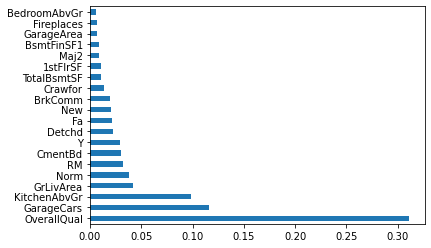

In [180]:
feat_importance = rfr.feature_importances_
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [181]:
df1 = Train[['OverallQual','GarageCars','KitchenAbvGr','GrLivArea','Norm','RM','CmentBd','Y','Detchd','Fa','New','BrkComm','Crawfor','TotalBsmtSF','1stFlrSF','Maj2','BsmtFinSF1','GarageArea','Fireplaces','BedroomAbvGr']]

In [182]:
x_train,x_test,y_train,y_test=train_test_split(df1,Y, test_size = 0.22, random_state=199)

In [183]:
gscvxgb.fit(X_train, Y_train)

GridSearchCV(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=16,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=0),
             param_grid={'b

In [184]:
feat = gscvxgb.best_estimator_.predict(X_test)

In [185]:
r2_score(Y_test, feat)

0.8793159874192908

from above we can see that we are getting the same score from feature selection also

Now let us try PCA technique

In [186]:
df1 = Train.drop('SalePrice', 1)

In [187]:
pca = PCA(n_components=100)
df2 = pca.fit_transform(df1)

In [188]:
df2 = pd.DataFrame(df2)

In [189]:
x_train, x_test,y_train,y_test = train_test_split(df2, Y, test_size = 0.22, random_state = 199)

In [190]:
gscvxgb.fit(X_train, Y_train)
PCAT = gscvxgb.predict(X_test)
print(r2_score(Y_test, PCAT))

0.8793159874192908


from above we can see that we are getting 88% in all the technique so lets us save the model

In [191]:
gscvxgb.fit(X_train, Y_train)
predgscvxgb = gscvxgb.predict(X_test)
accgscvxgb = r2_score(Y_test, predgscvxgb)*100
print("R2 Score:", accgscvxgb)
print("Mean Squared Error:", mean_squared_error(Y_test, predgscvxgb))
print("Mean Absolute Error:", mean_absolute_error(Y_test, predgscvxgb))

R2 Score: 87.93159874192908
Mean Squared Error: 827446143.9673474
Mean Absolute Error: 18508.658925097276


## 88% Accuracy 

now lets save the model and predict the test file

In [192]:
joblib.dump(gscvxgb.best_estimator_,'housing.pkl')

['housing.pkl']

## Saving the model

In [193]:
model = joblib.load("S:\Data Science Projects\Flip Robo\PFA_Housing_Project\housing.pkl")

## Predicting the Test file using saved model

In [194]:
Test.drop('SalePrice', 1, inplace=True)

In [195]:
Predictions = model.predict(Test)

In [196]:
sub = {
    'id': fin['Id'],
    'SalePrice':Predictions
}

In [197]:
Submission = pd.DataFrame.from_dict(sub)

In [198]:
Submission.to_csv("Housing.csv", encoding='UTF-8')